# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

Dataset: The chosen dataset for this assignment is: https://archive.ics.uci.edu/dataset/42/glass+identification

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [2]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# variable information 
print(glass_identification.variables) 

y = y.values.ravel()
y_encoded = LabelEncoder().fit_transform(y)

df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

             name     role         type demographic       description  \
0       Id_number       ID      Integer        None              None   
1              RI  Feature   Continuous        None  refractive index   
2              Na  Feature   Continuous        None            Sodium   
3              Mg  Feature   Continuous        None         Magnesium   
4              Al  Feature   Continuous        None          Aluminum   
5              Si  Feature   Continuous        None           Silicon   
6               K  Feature   Continuous        None         Potassium   
7              Ca  Feature   Continuous        None           Calcium   
8              Ba  Feature   Continuous        None            Barium   
9              Fe  Feature   Continuous        None              Iron   
10  Type_of_glass   Target  Categorical        None              None   

                                    units missing_values  
0                                    None             no  
1    

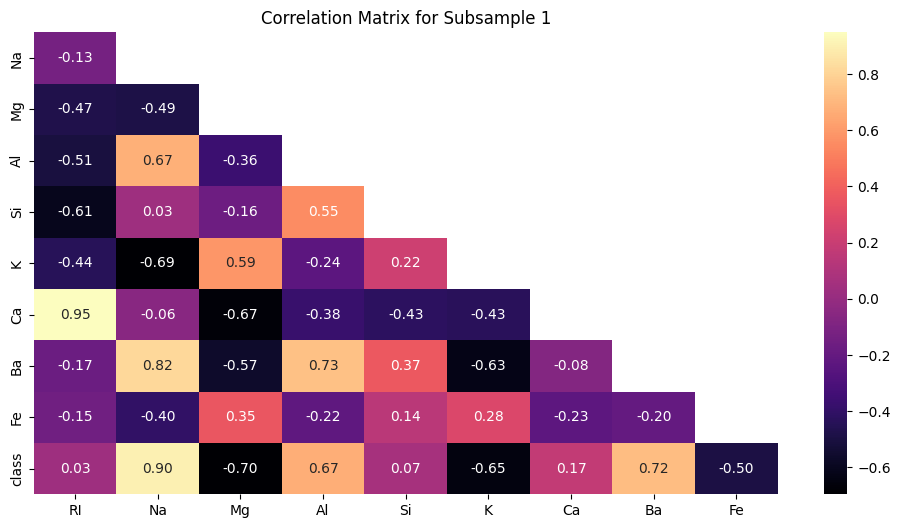

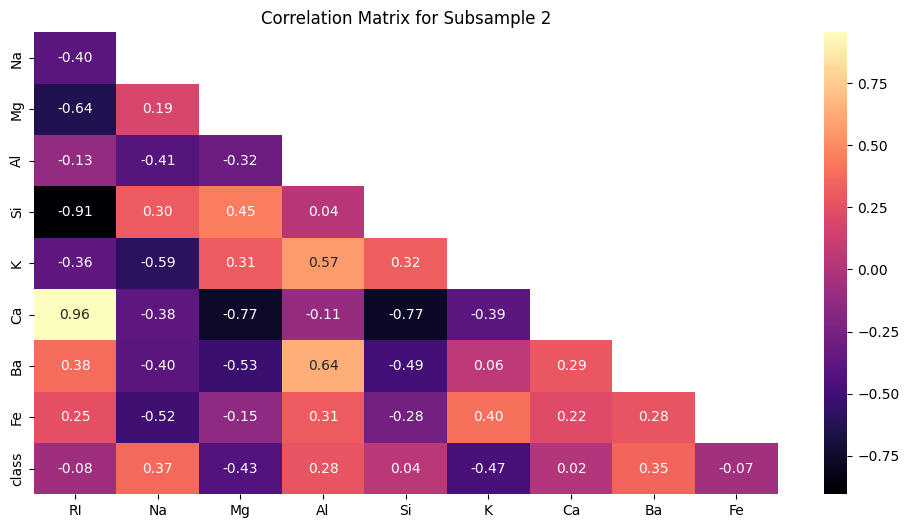

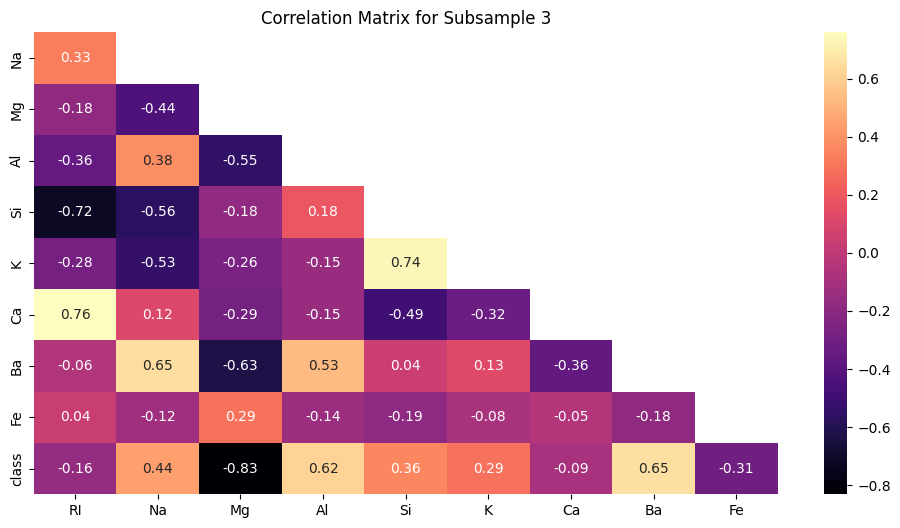

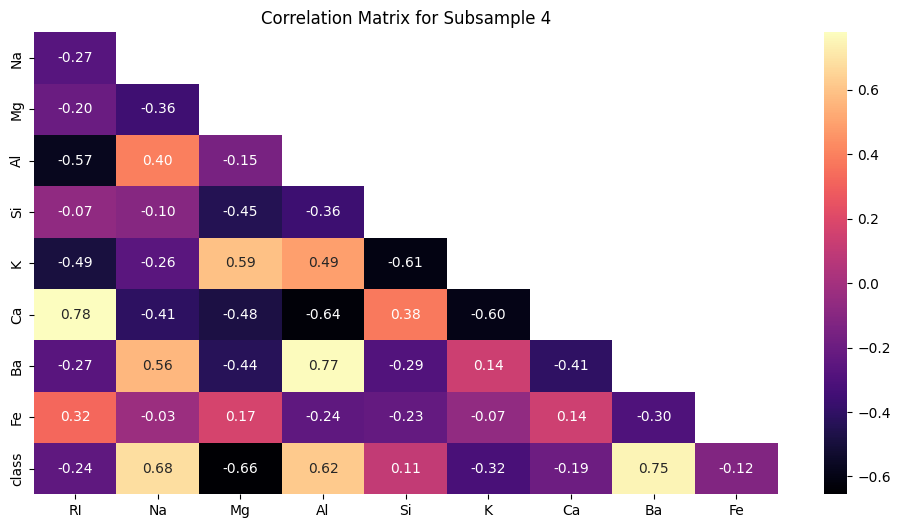

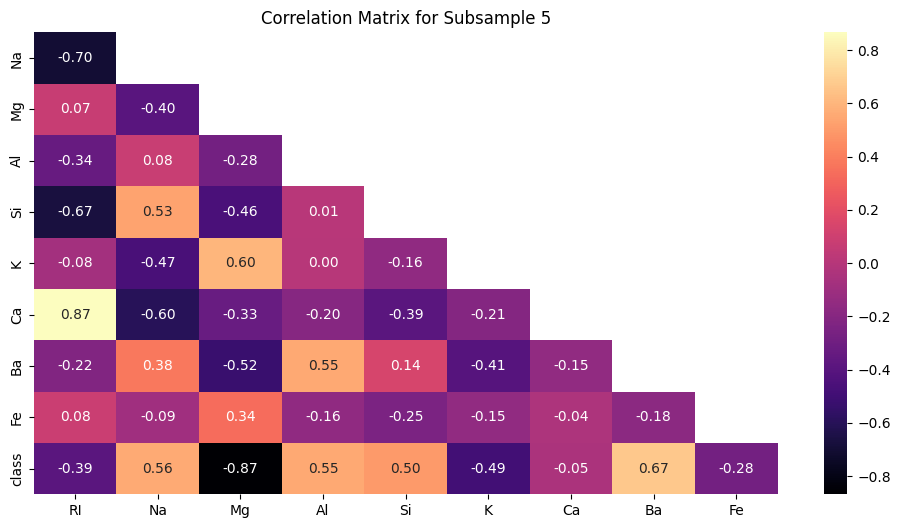

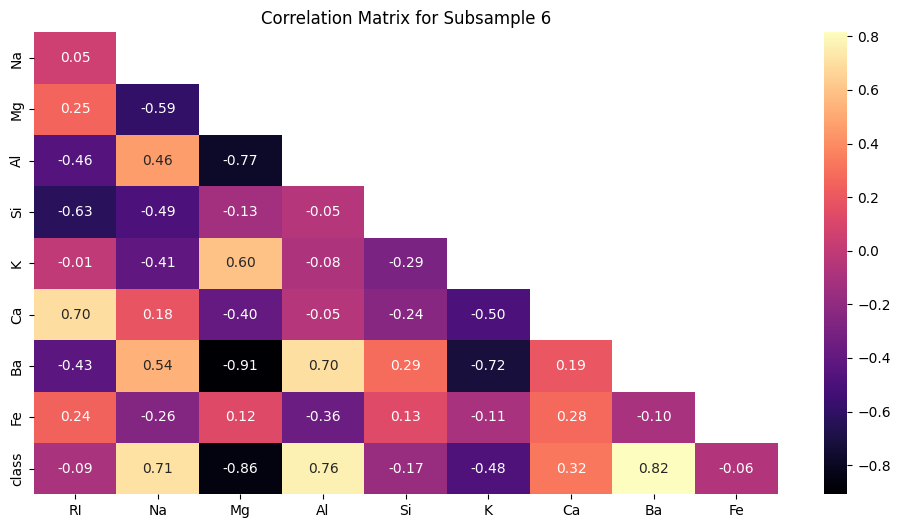

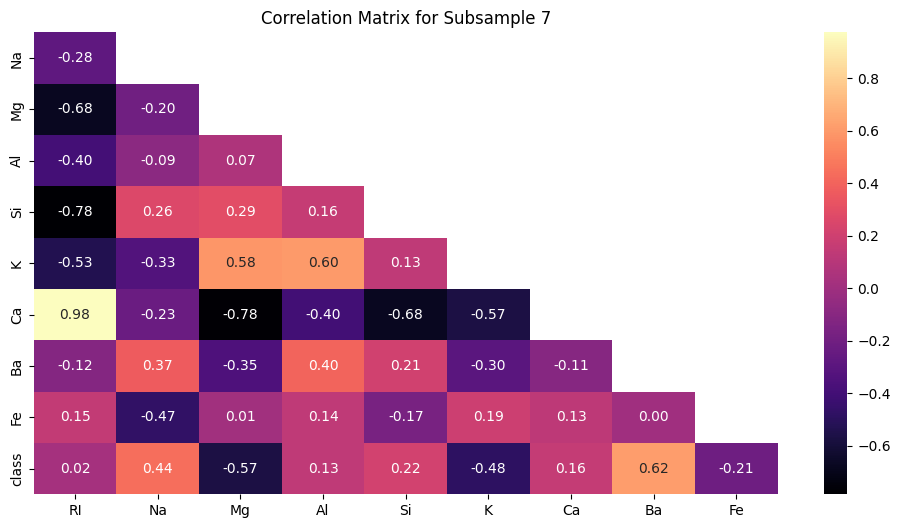

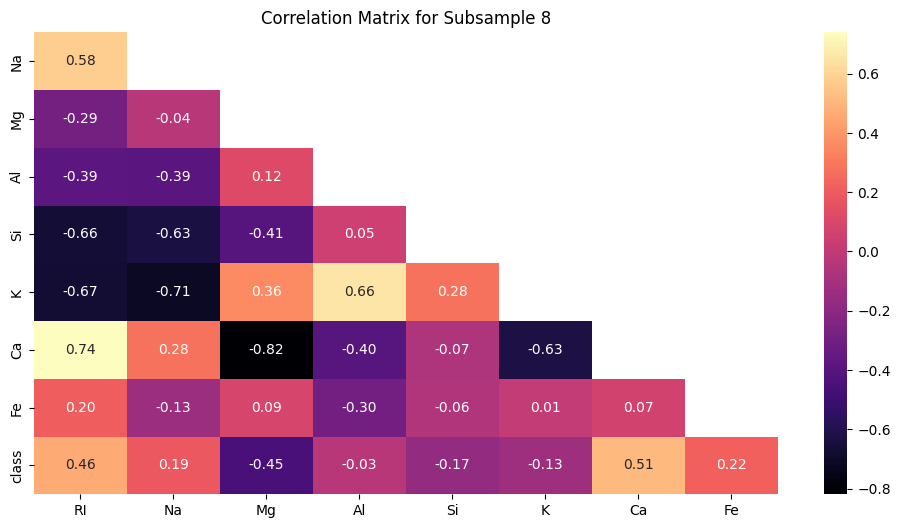

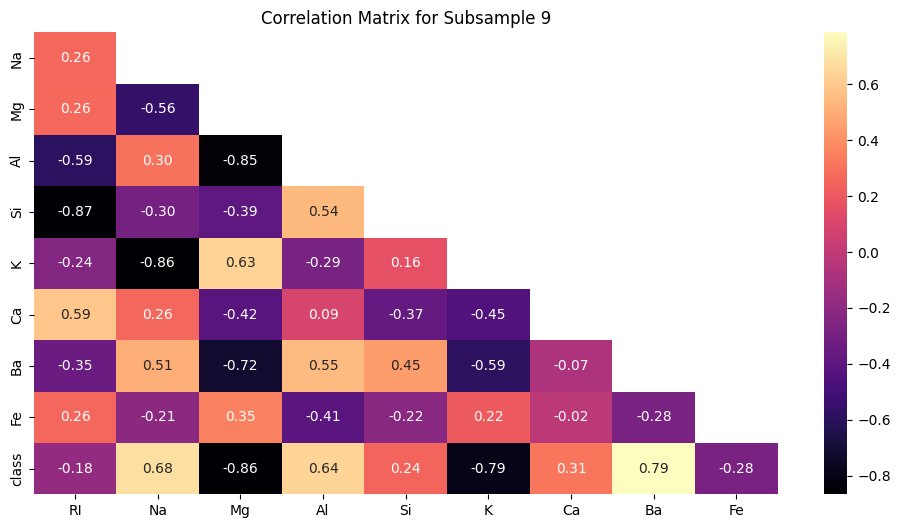

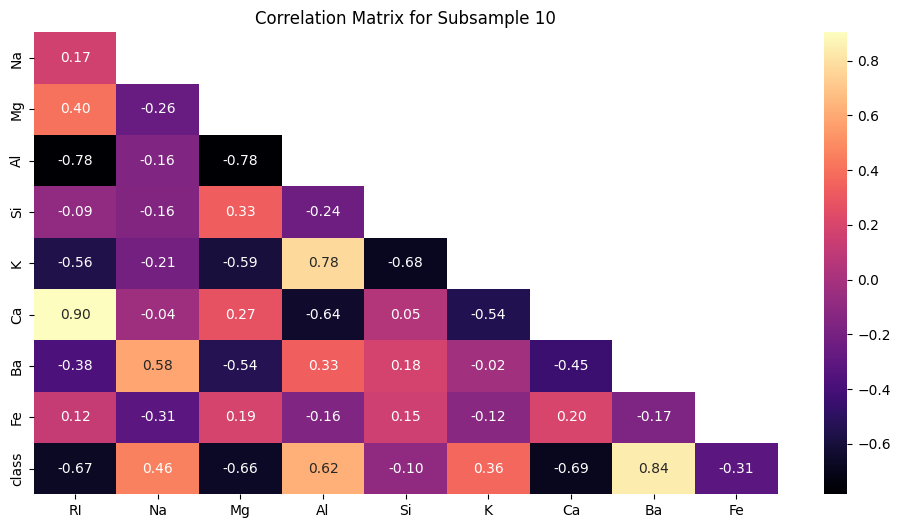

In [5]:
num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    correlation_matrix = subsample.corr()

    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_corr_viz, annot=True, cmap='magma', fmt='.2f')
    plt.title(f'Correlation Matrix for Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem, visually check if the target variable is imbalanced**

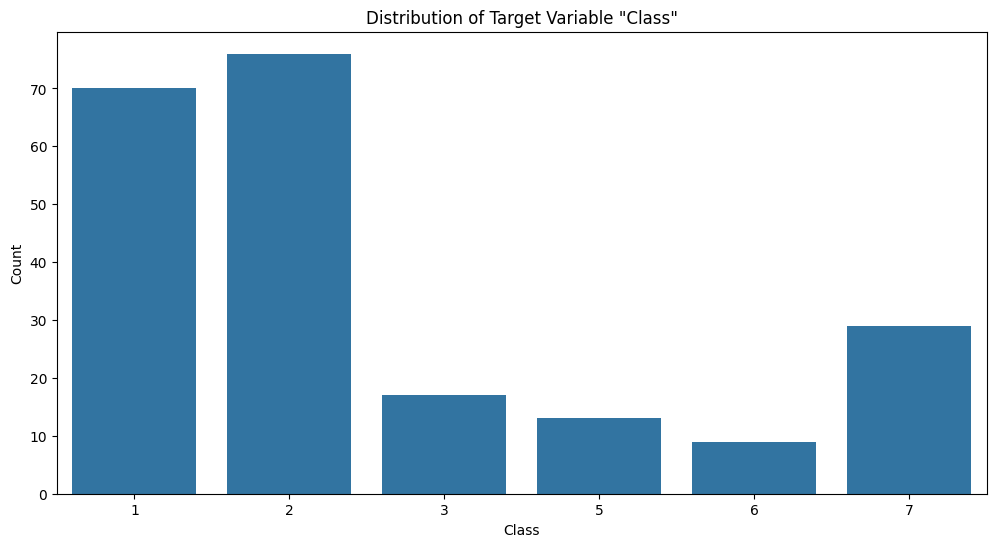

In [11]:
y = pd.Series(y).astype('category')

plt.figure(figsize=(12, 6))

sns.countplot(x=y)

plt.title('Distribution of Target Variable "Class"')

plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

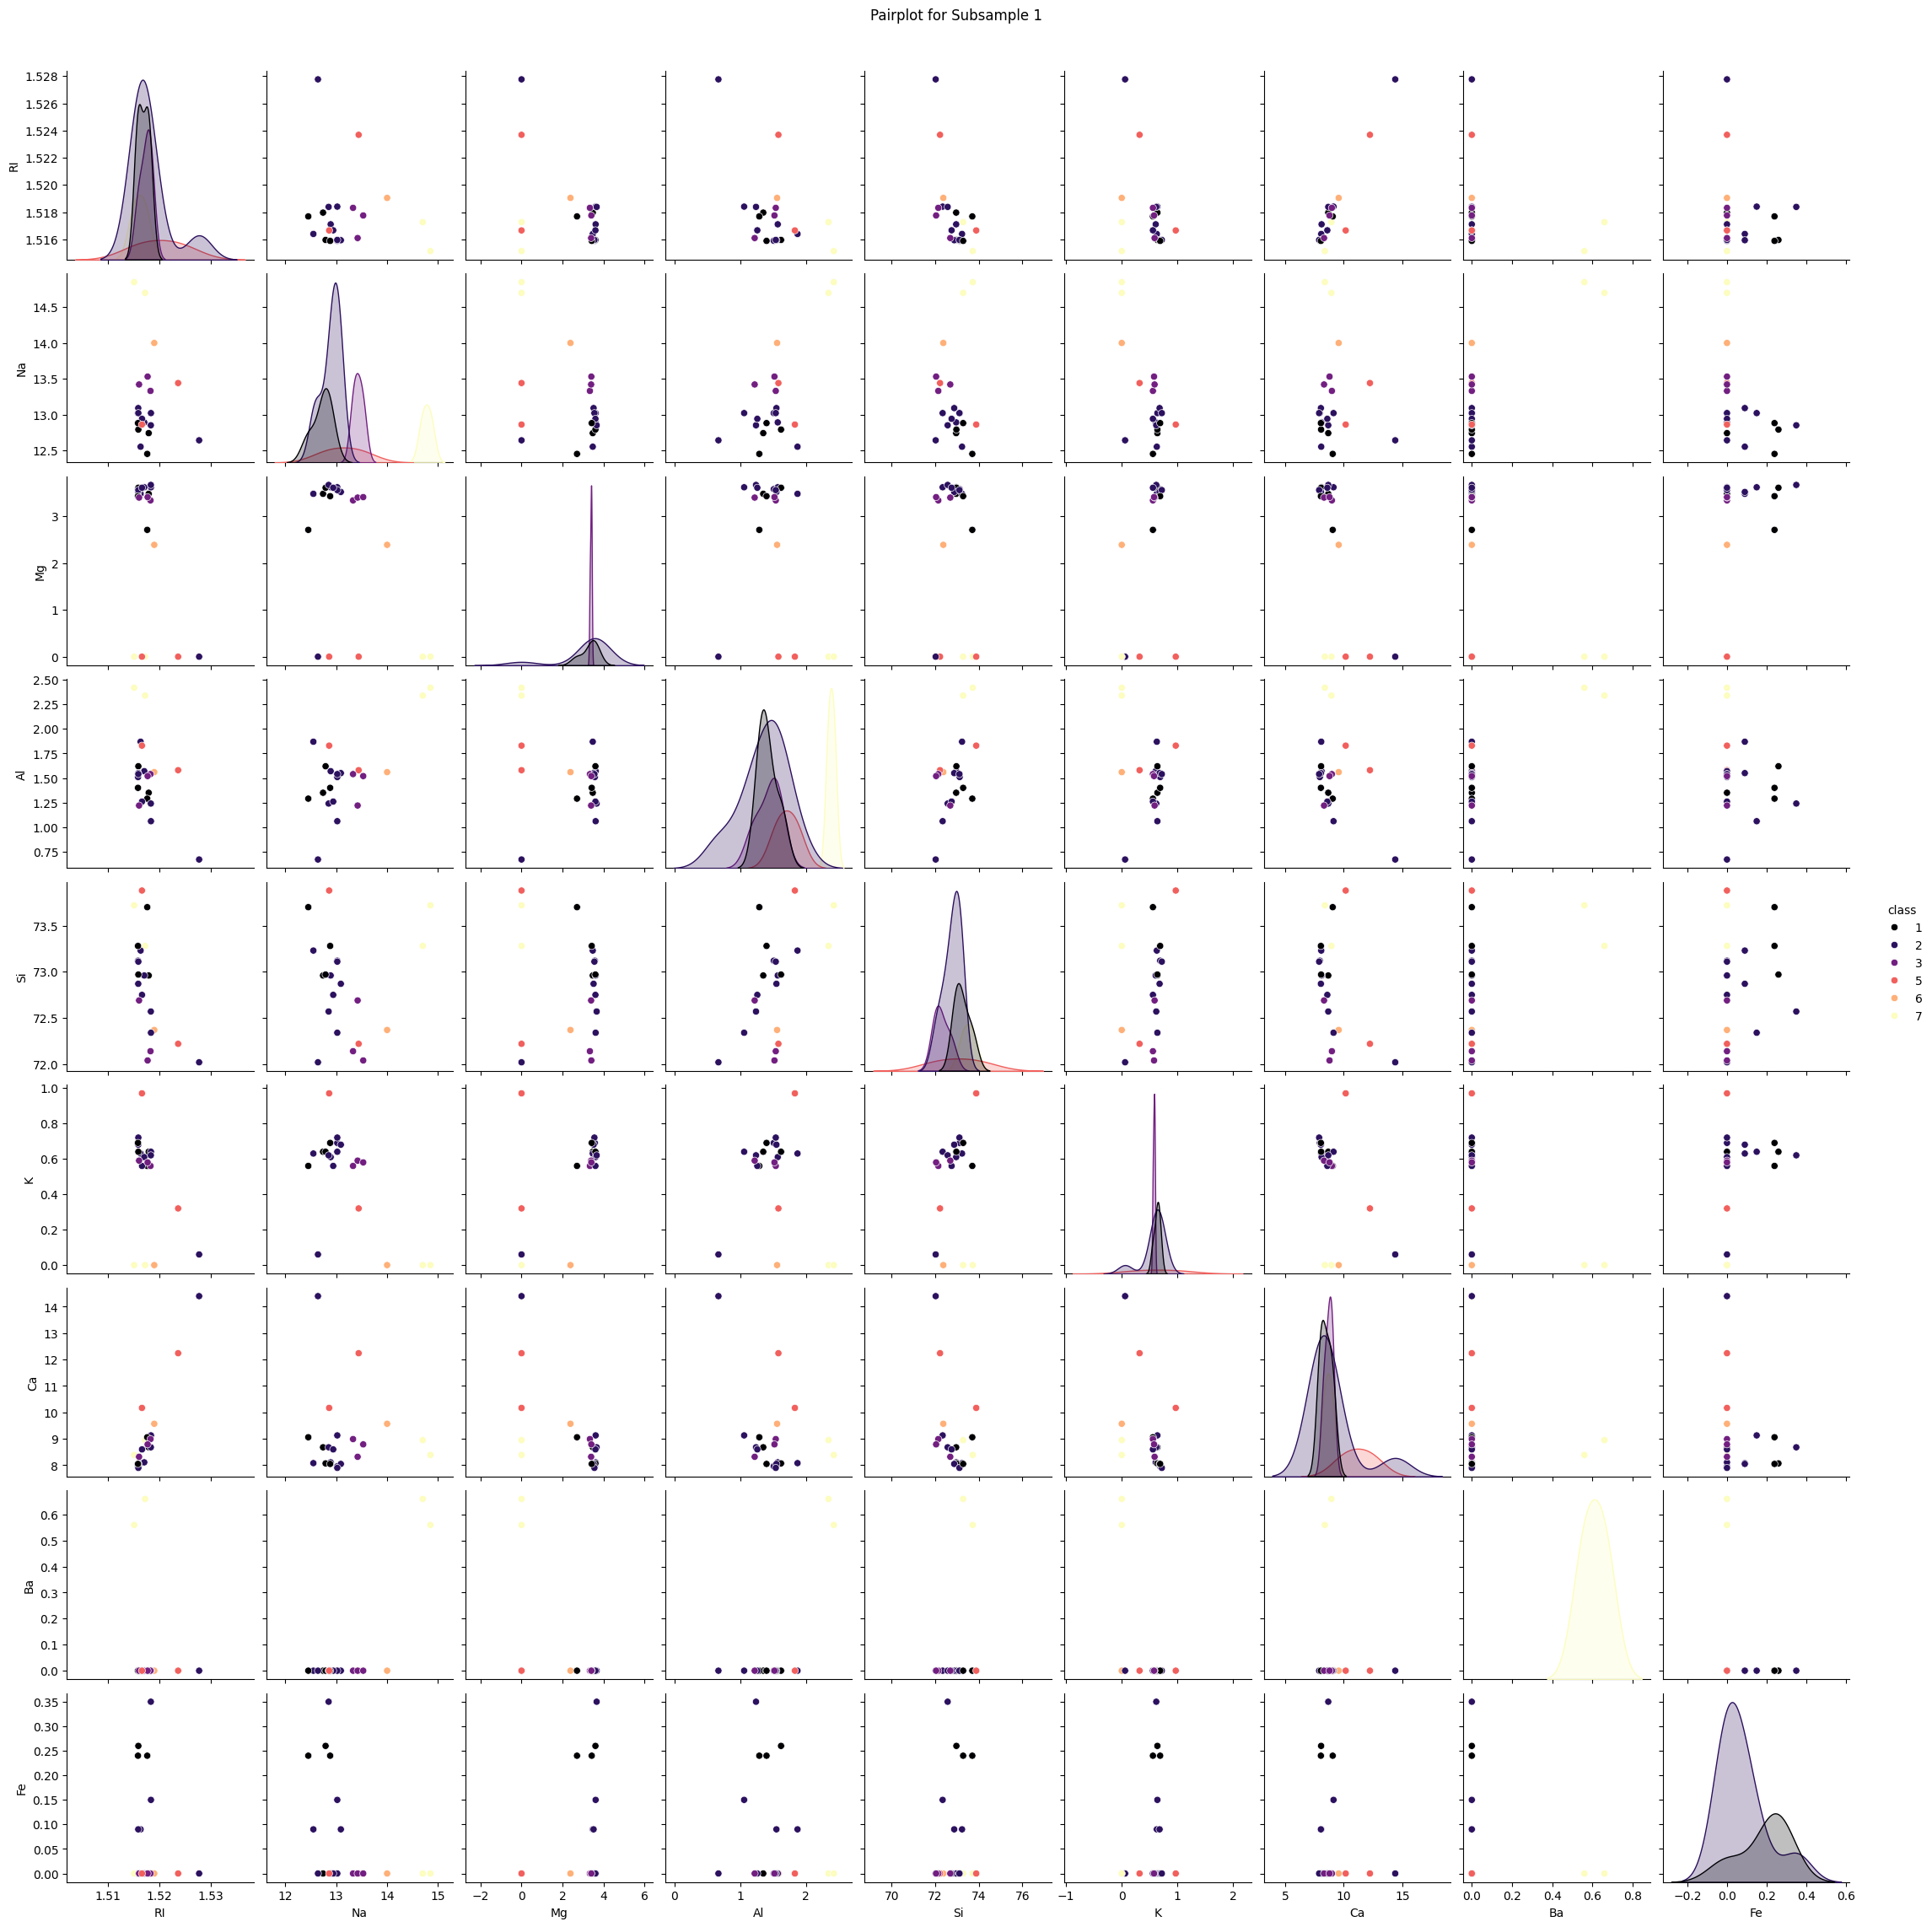

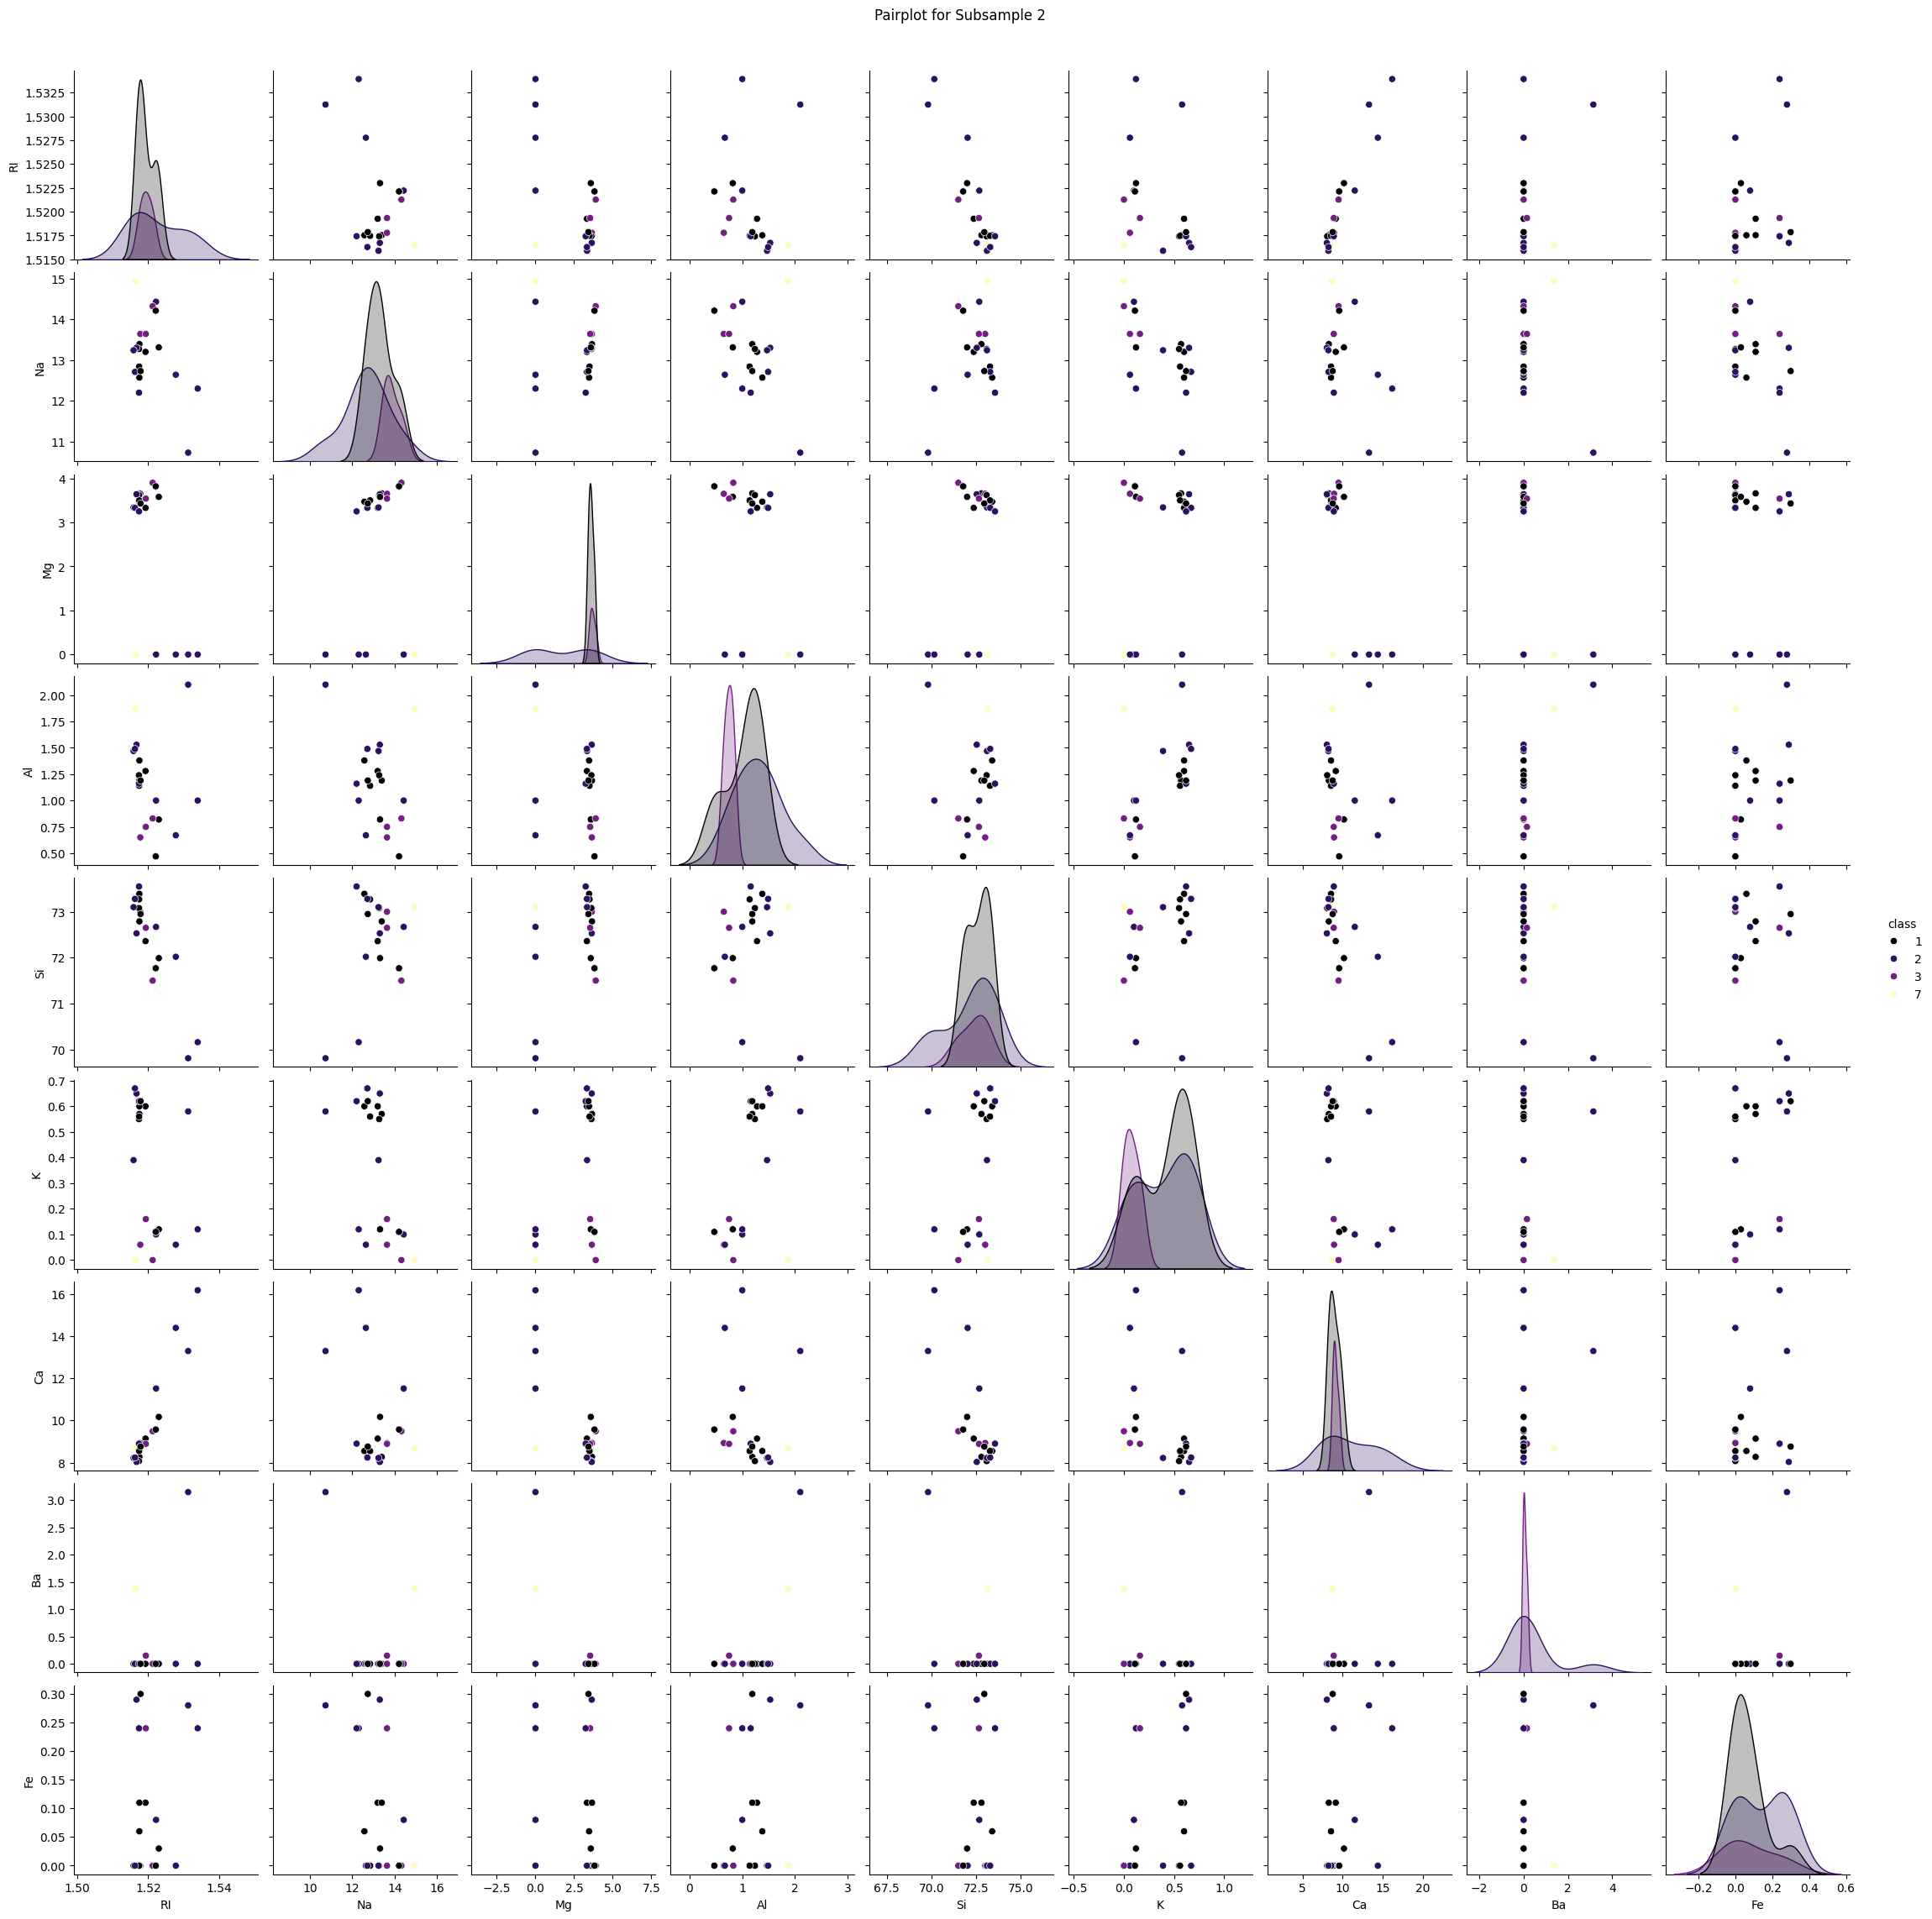

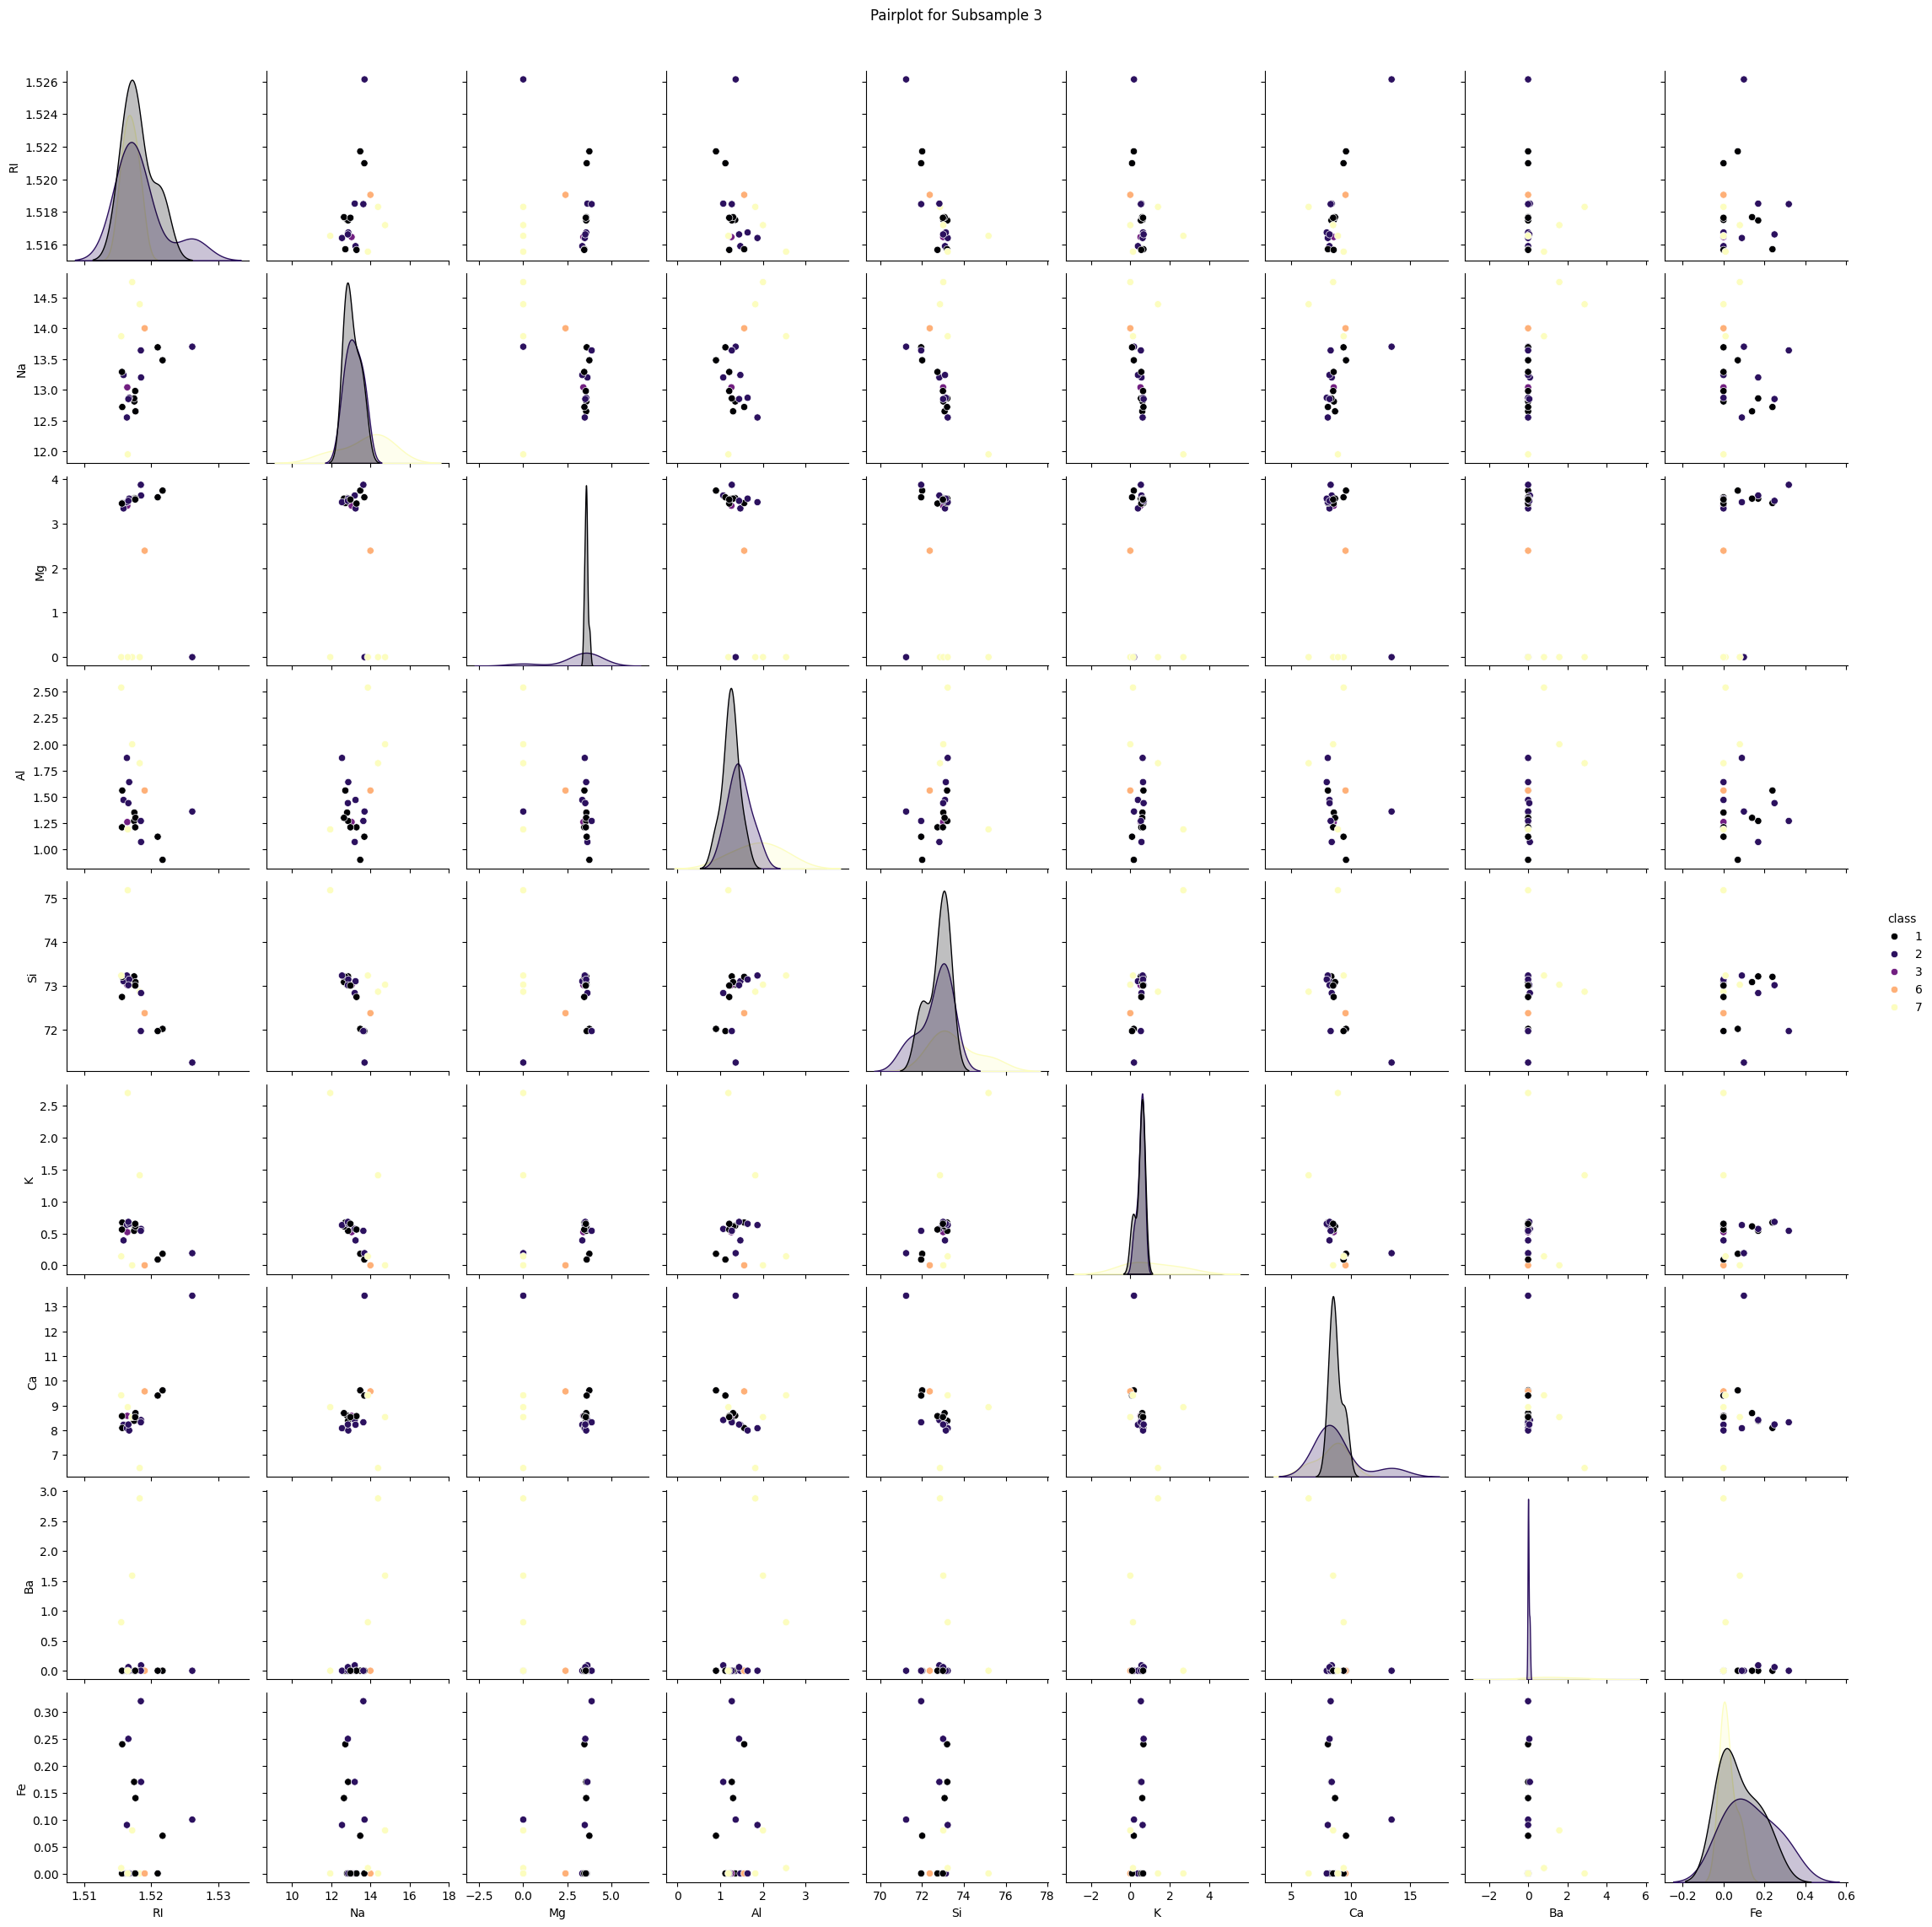

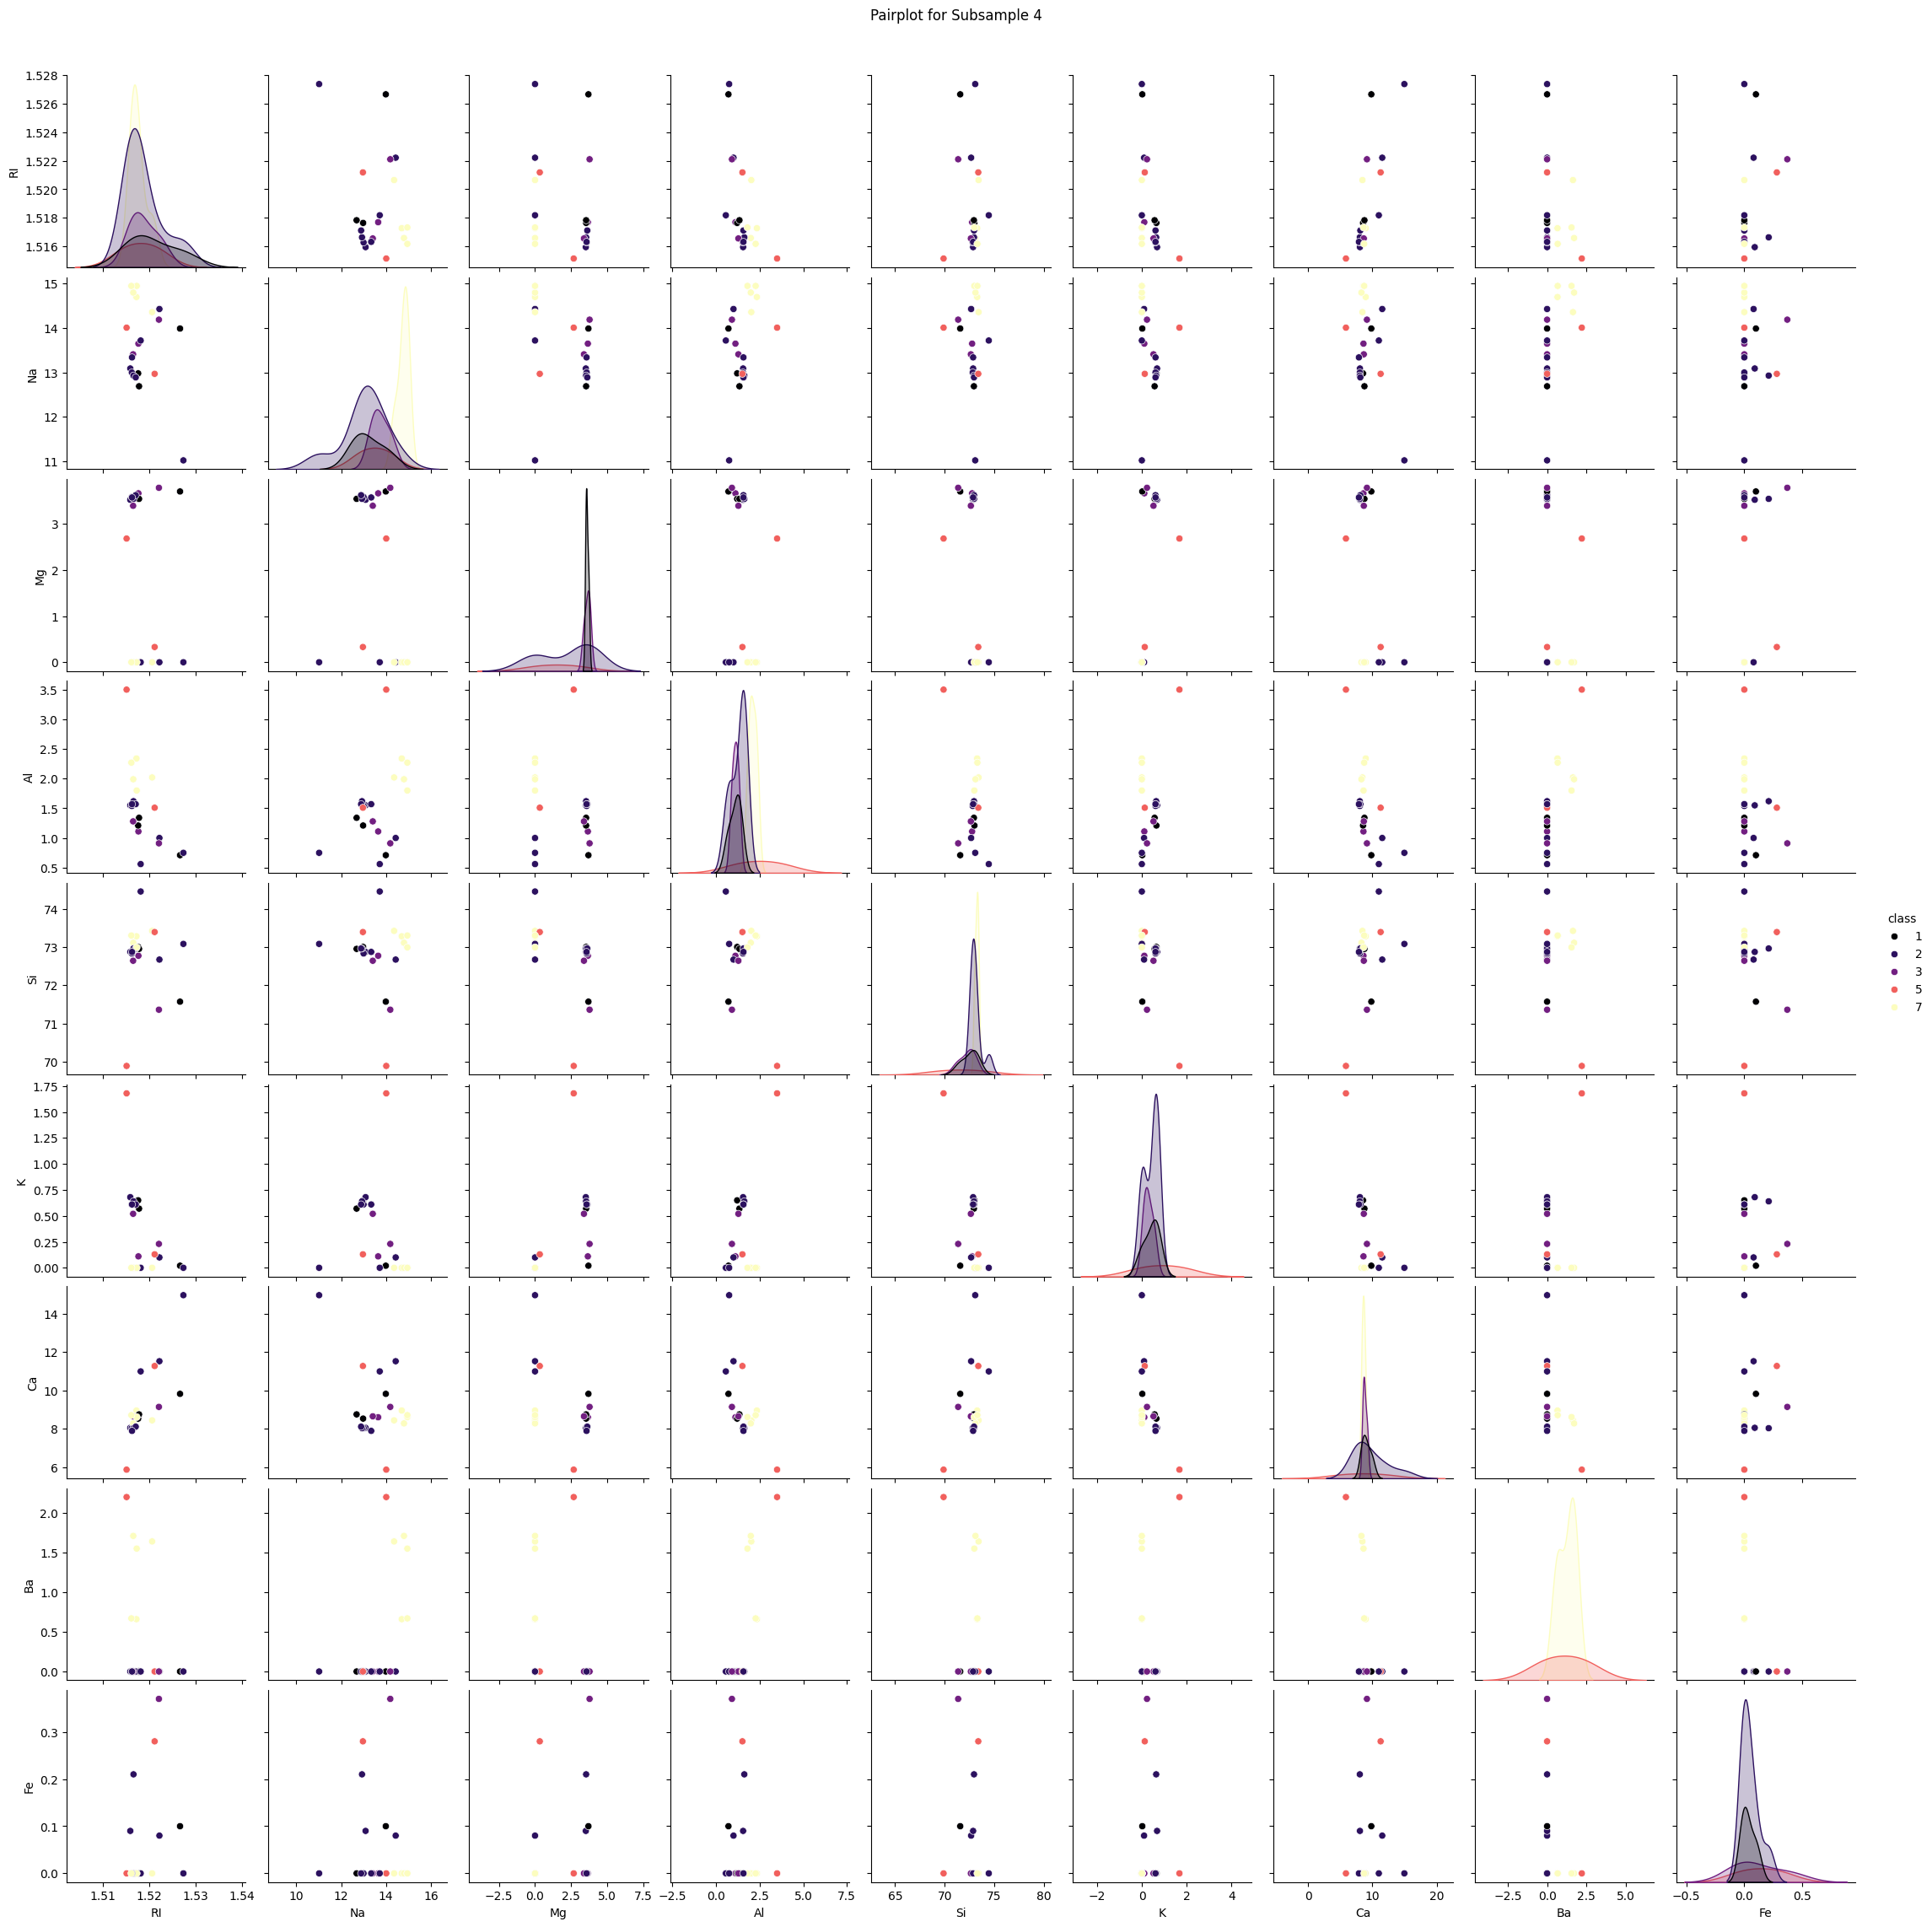

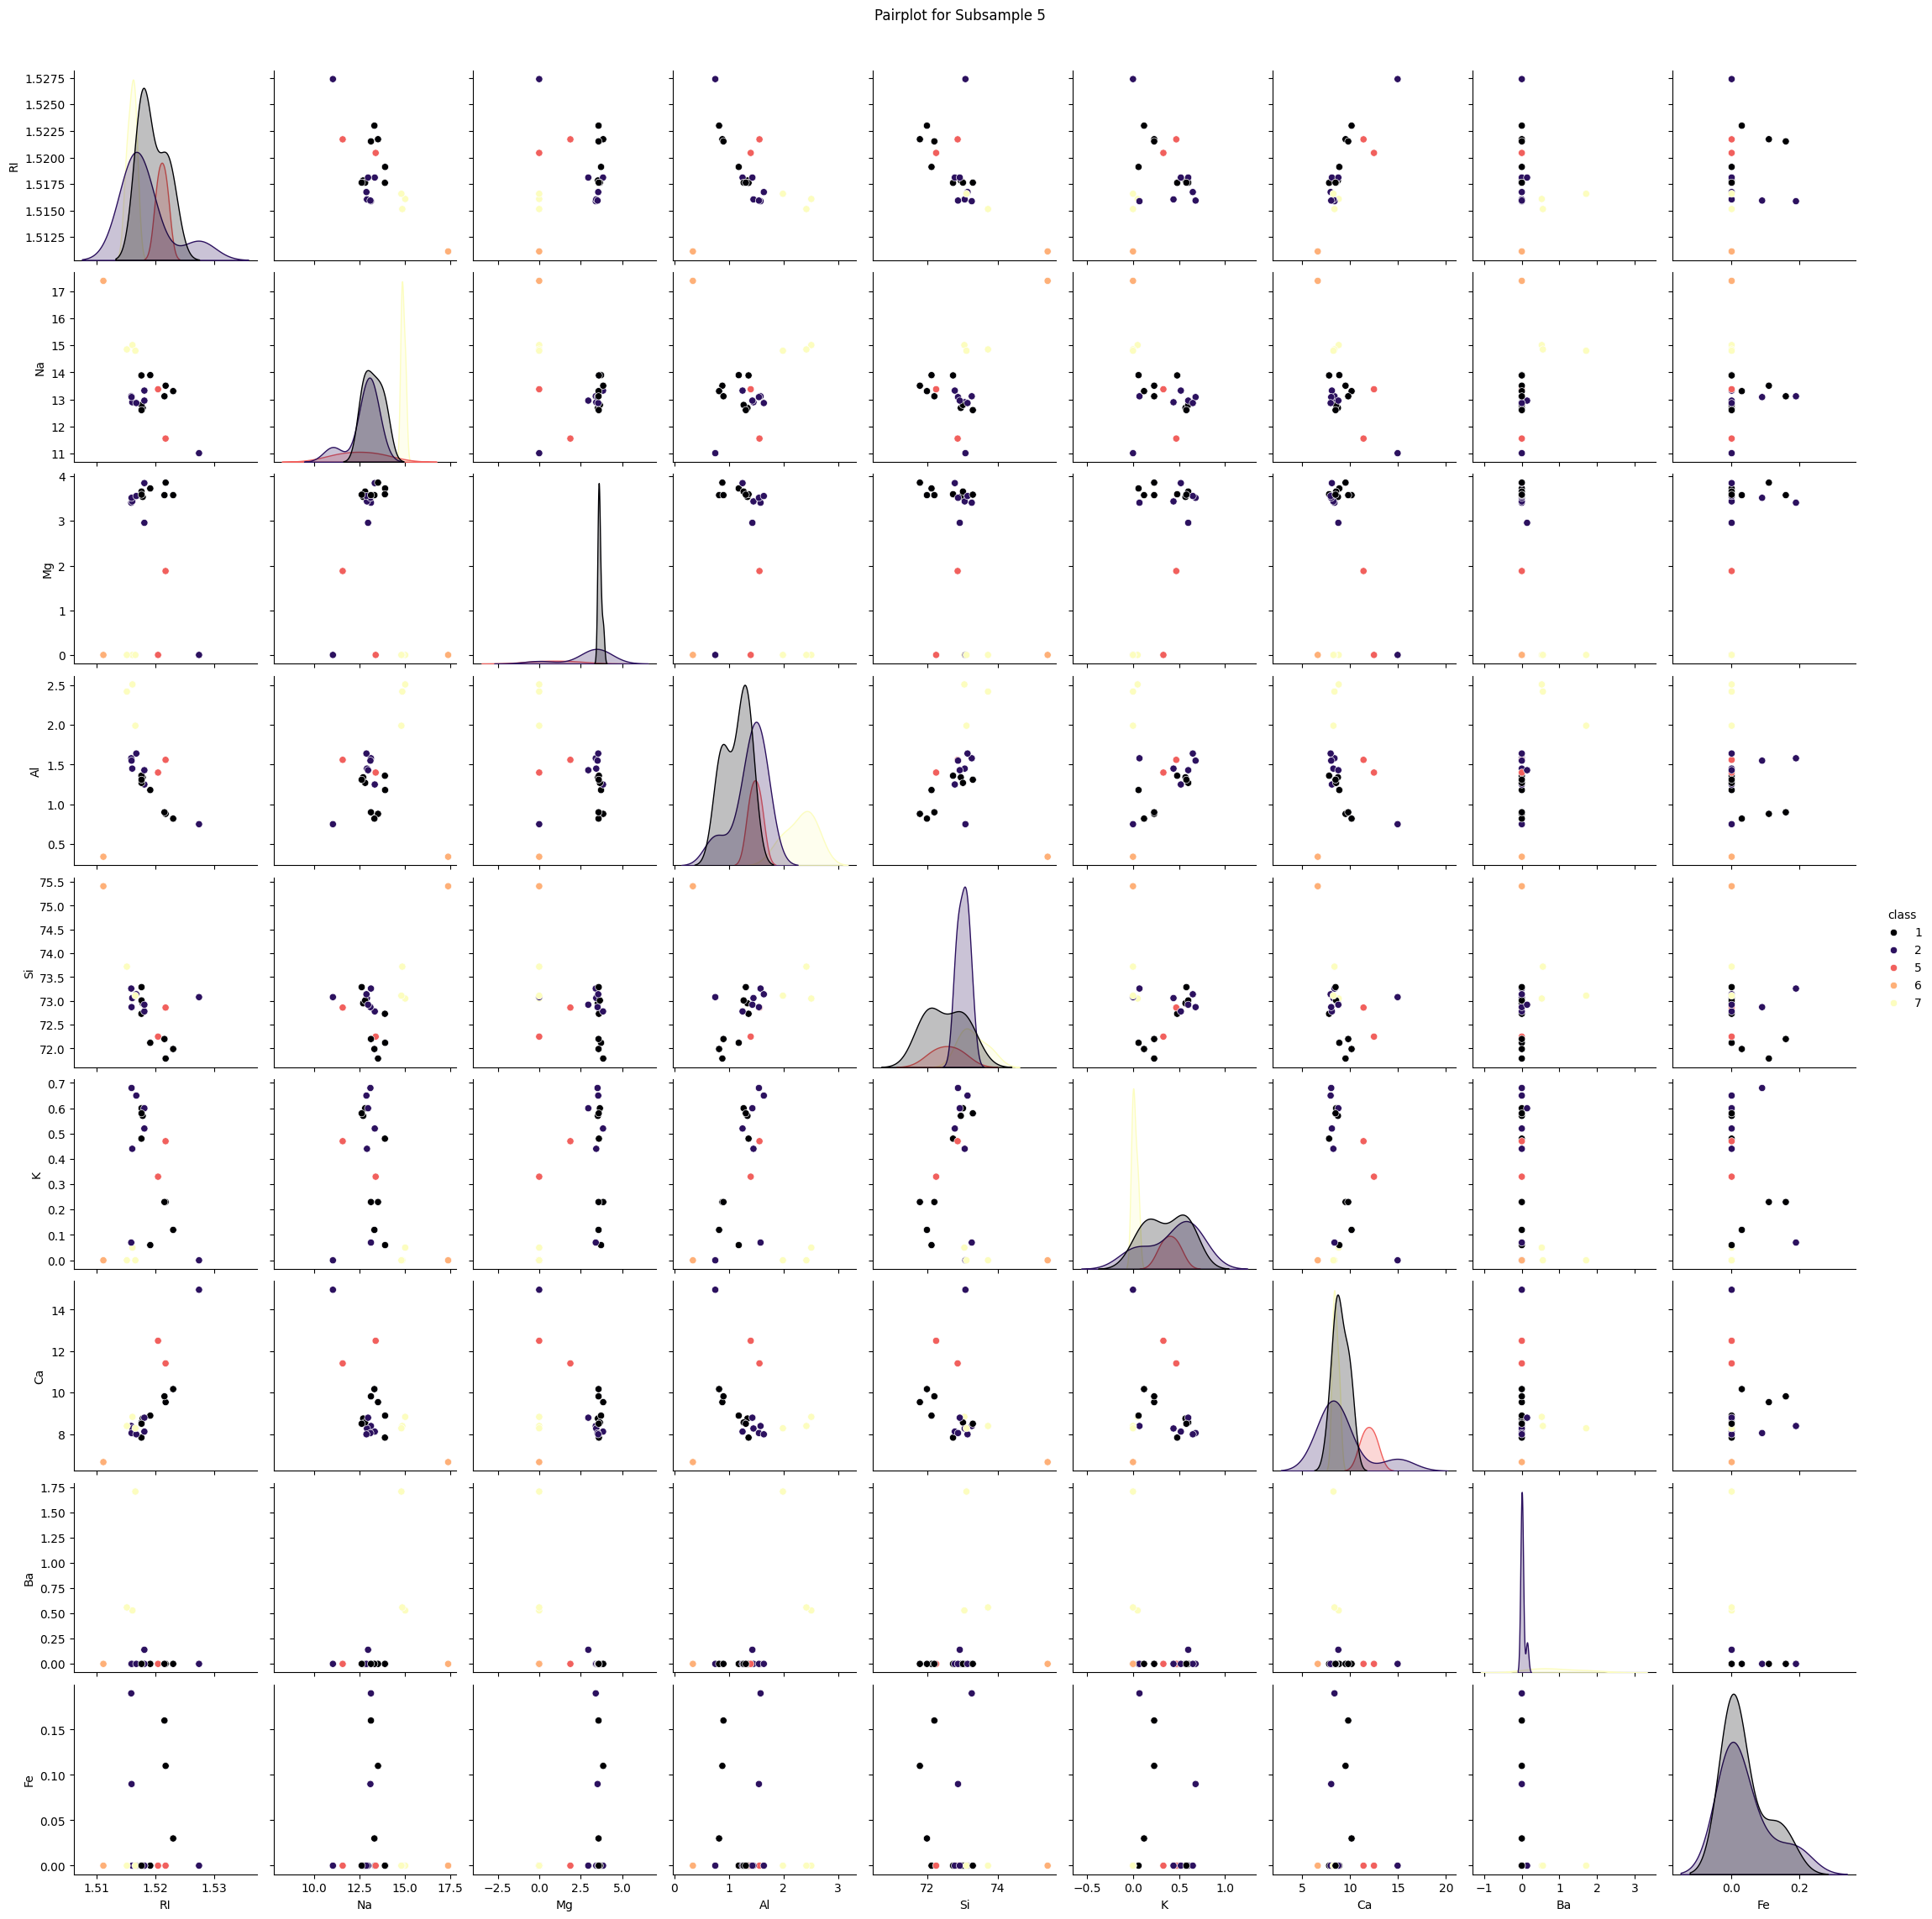

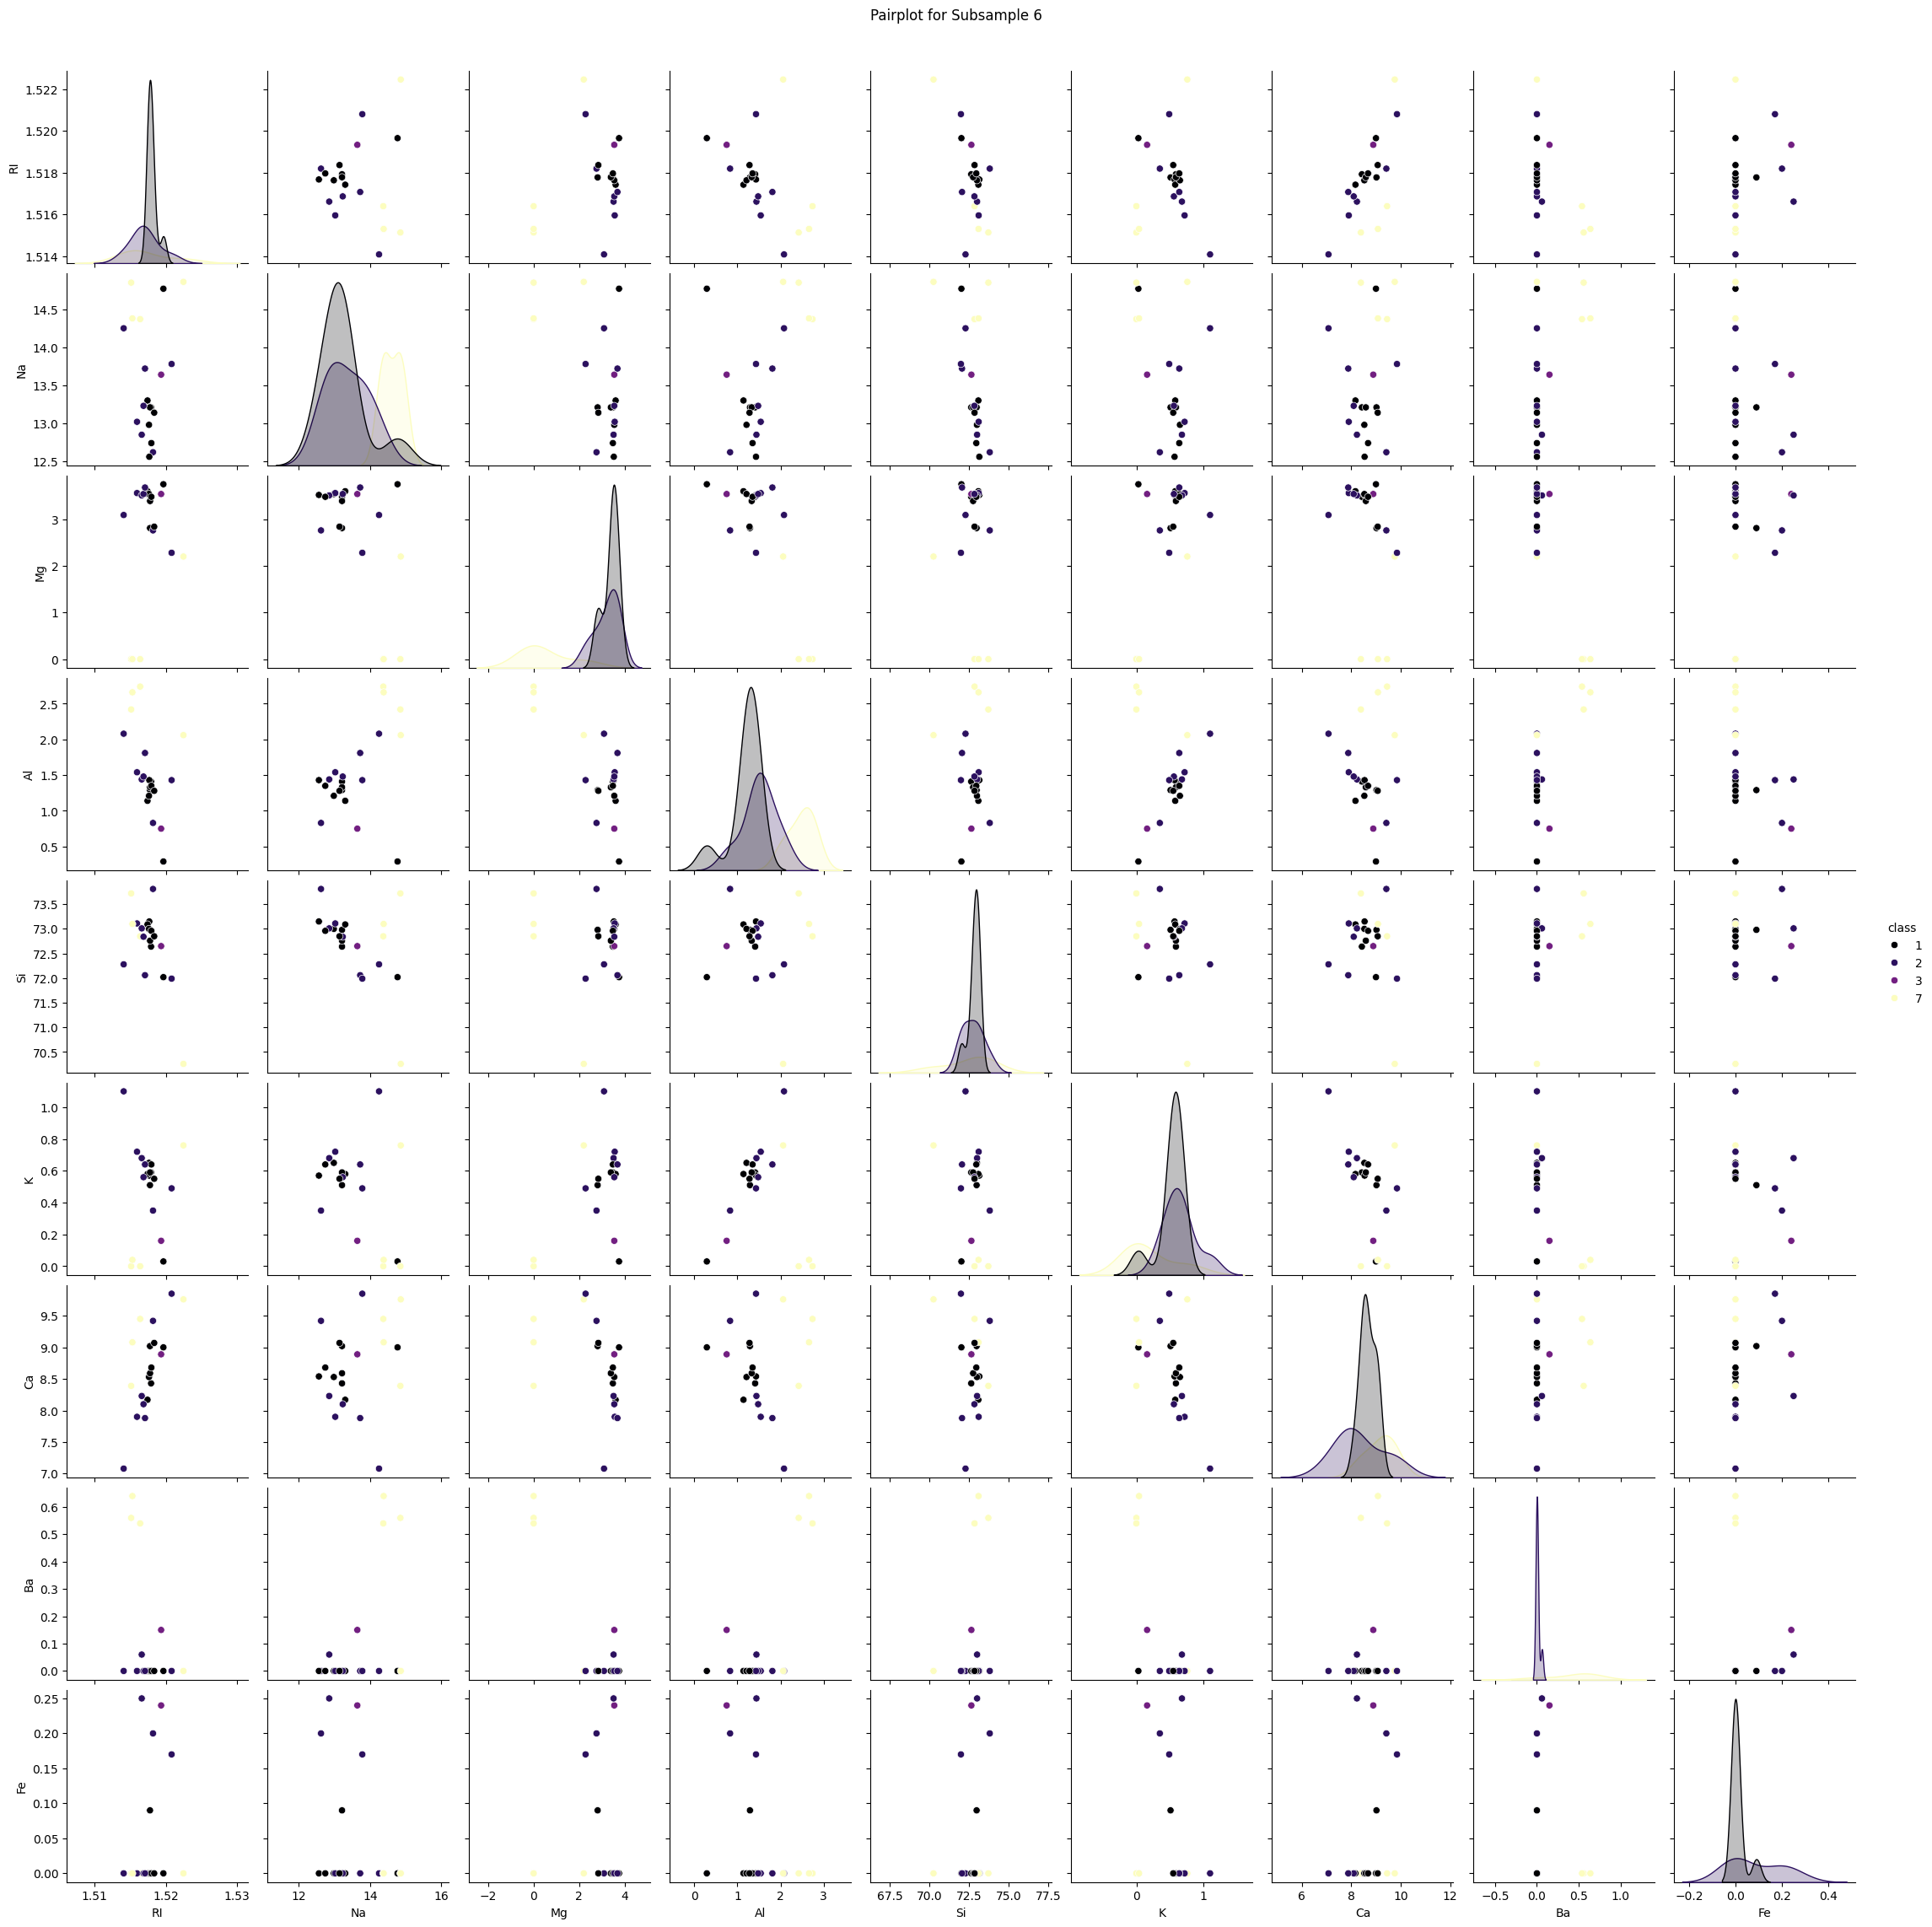

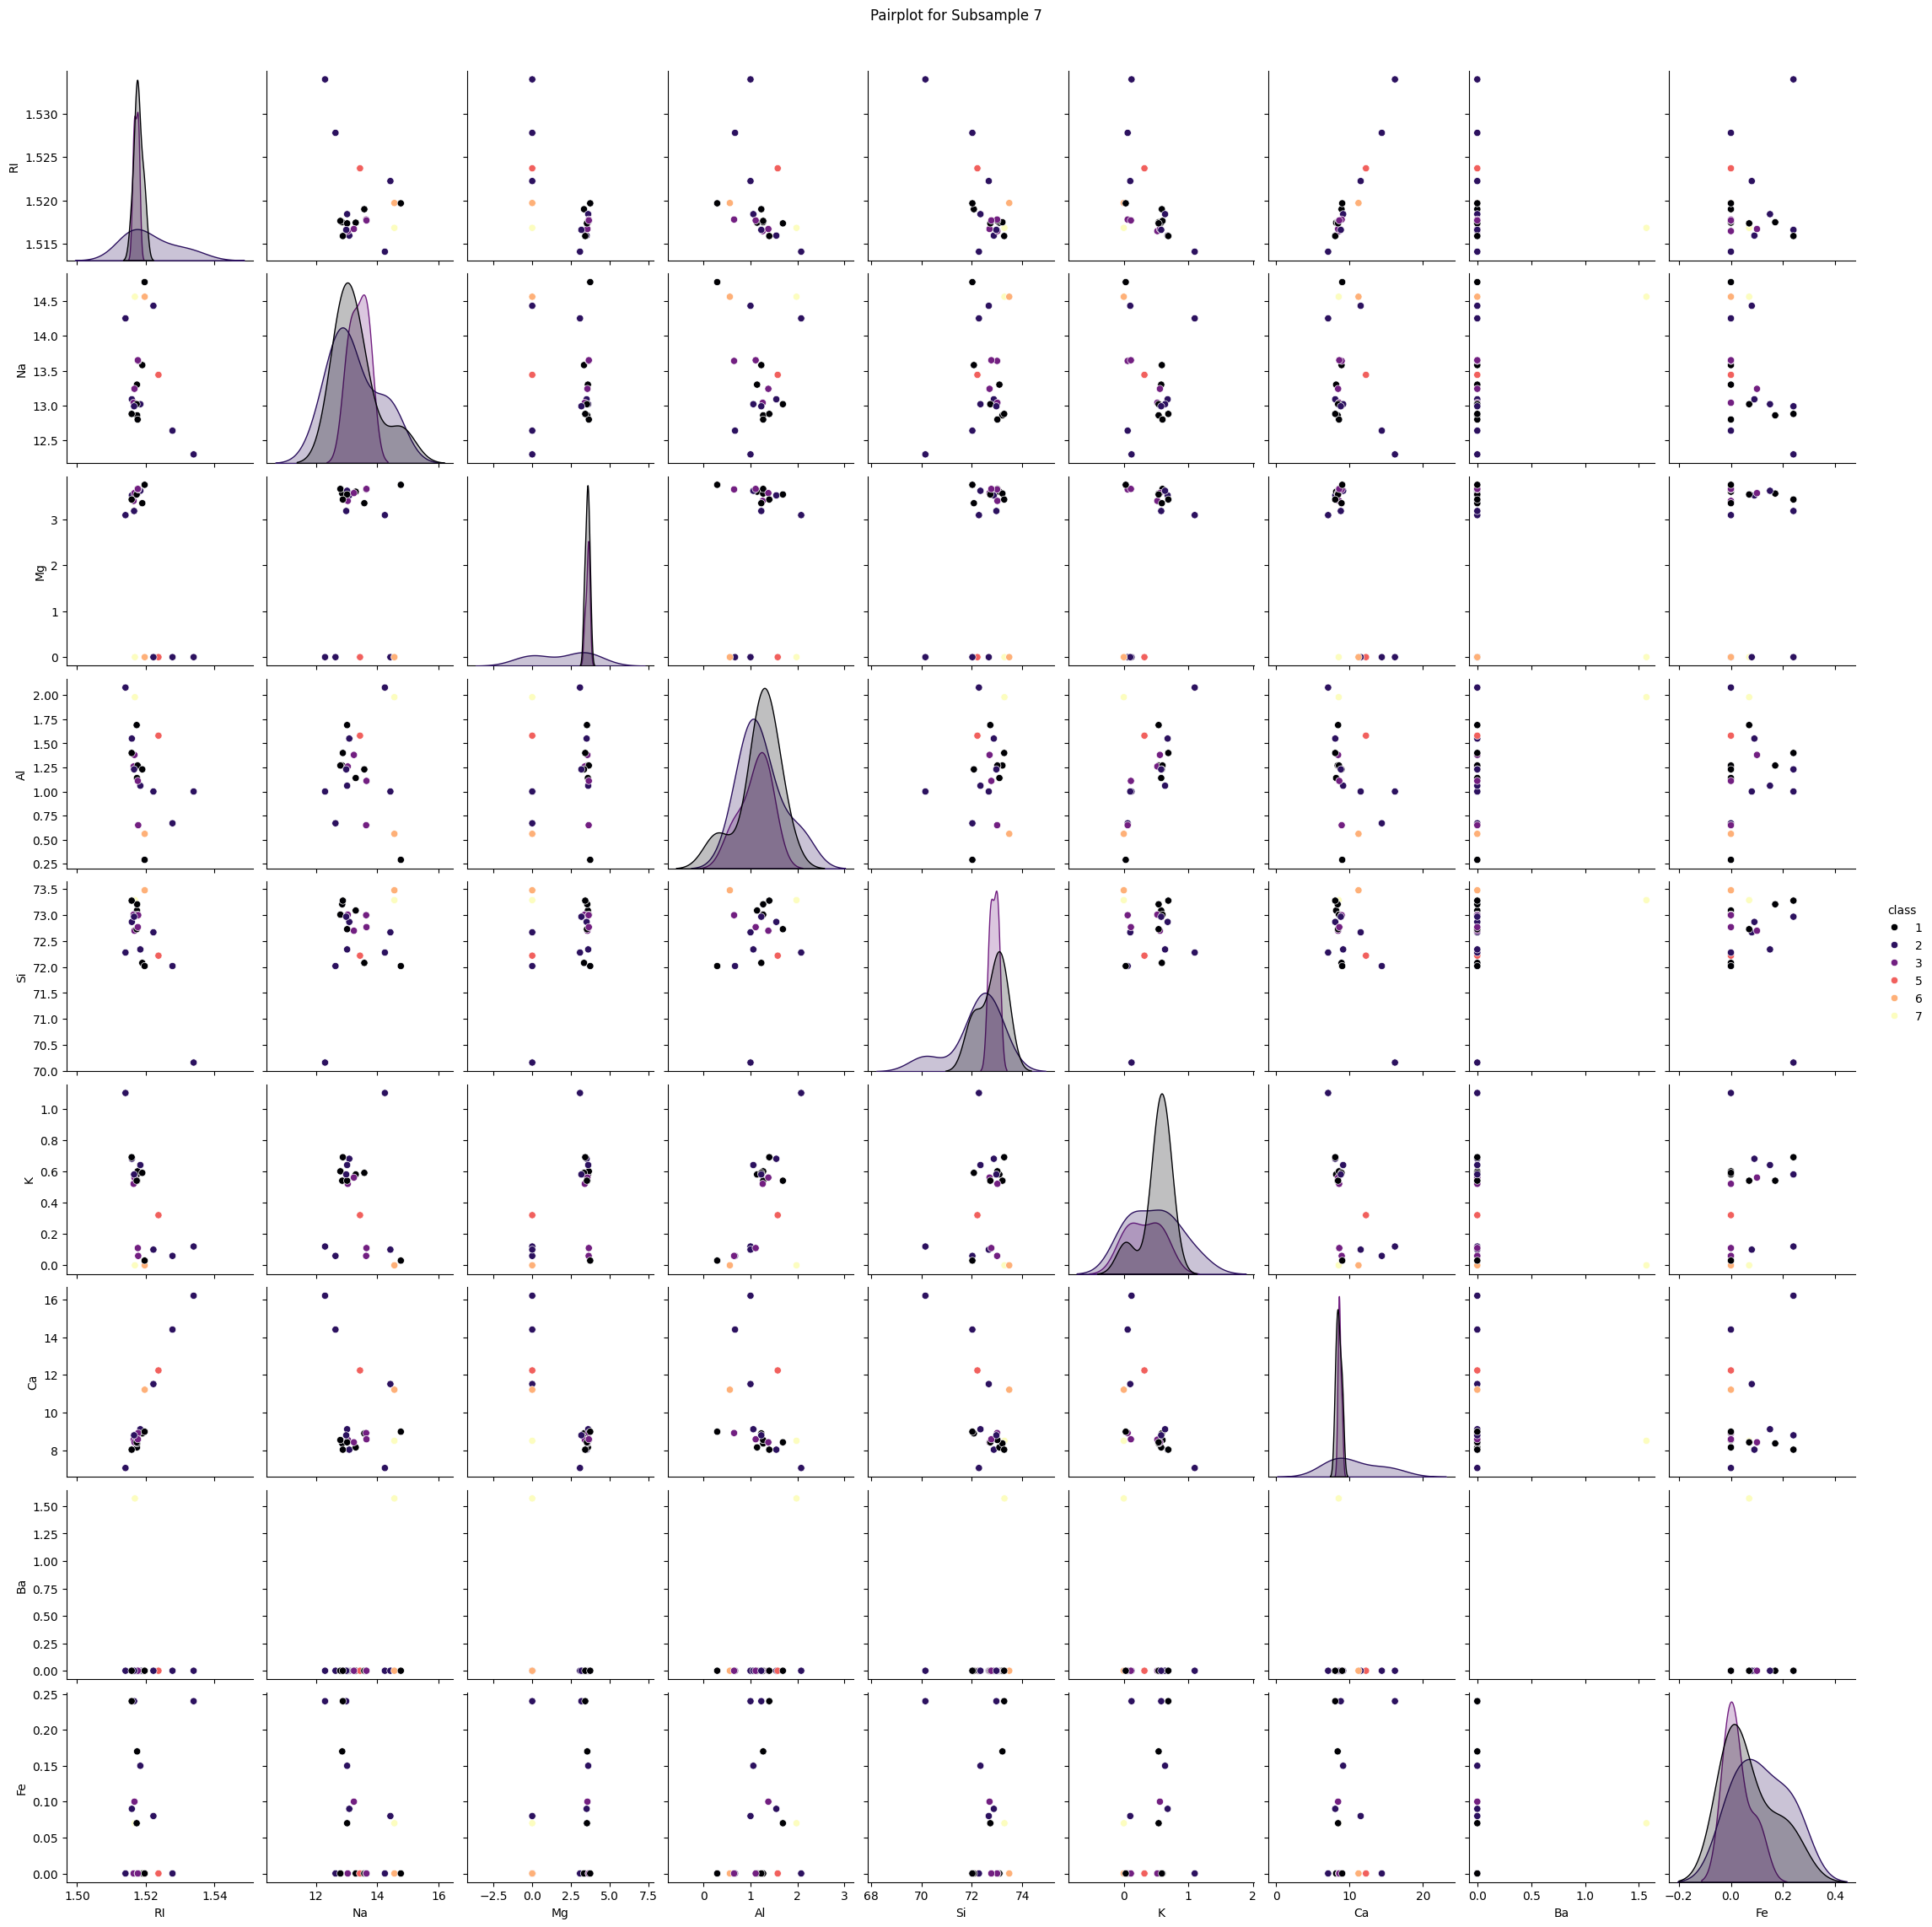

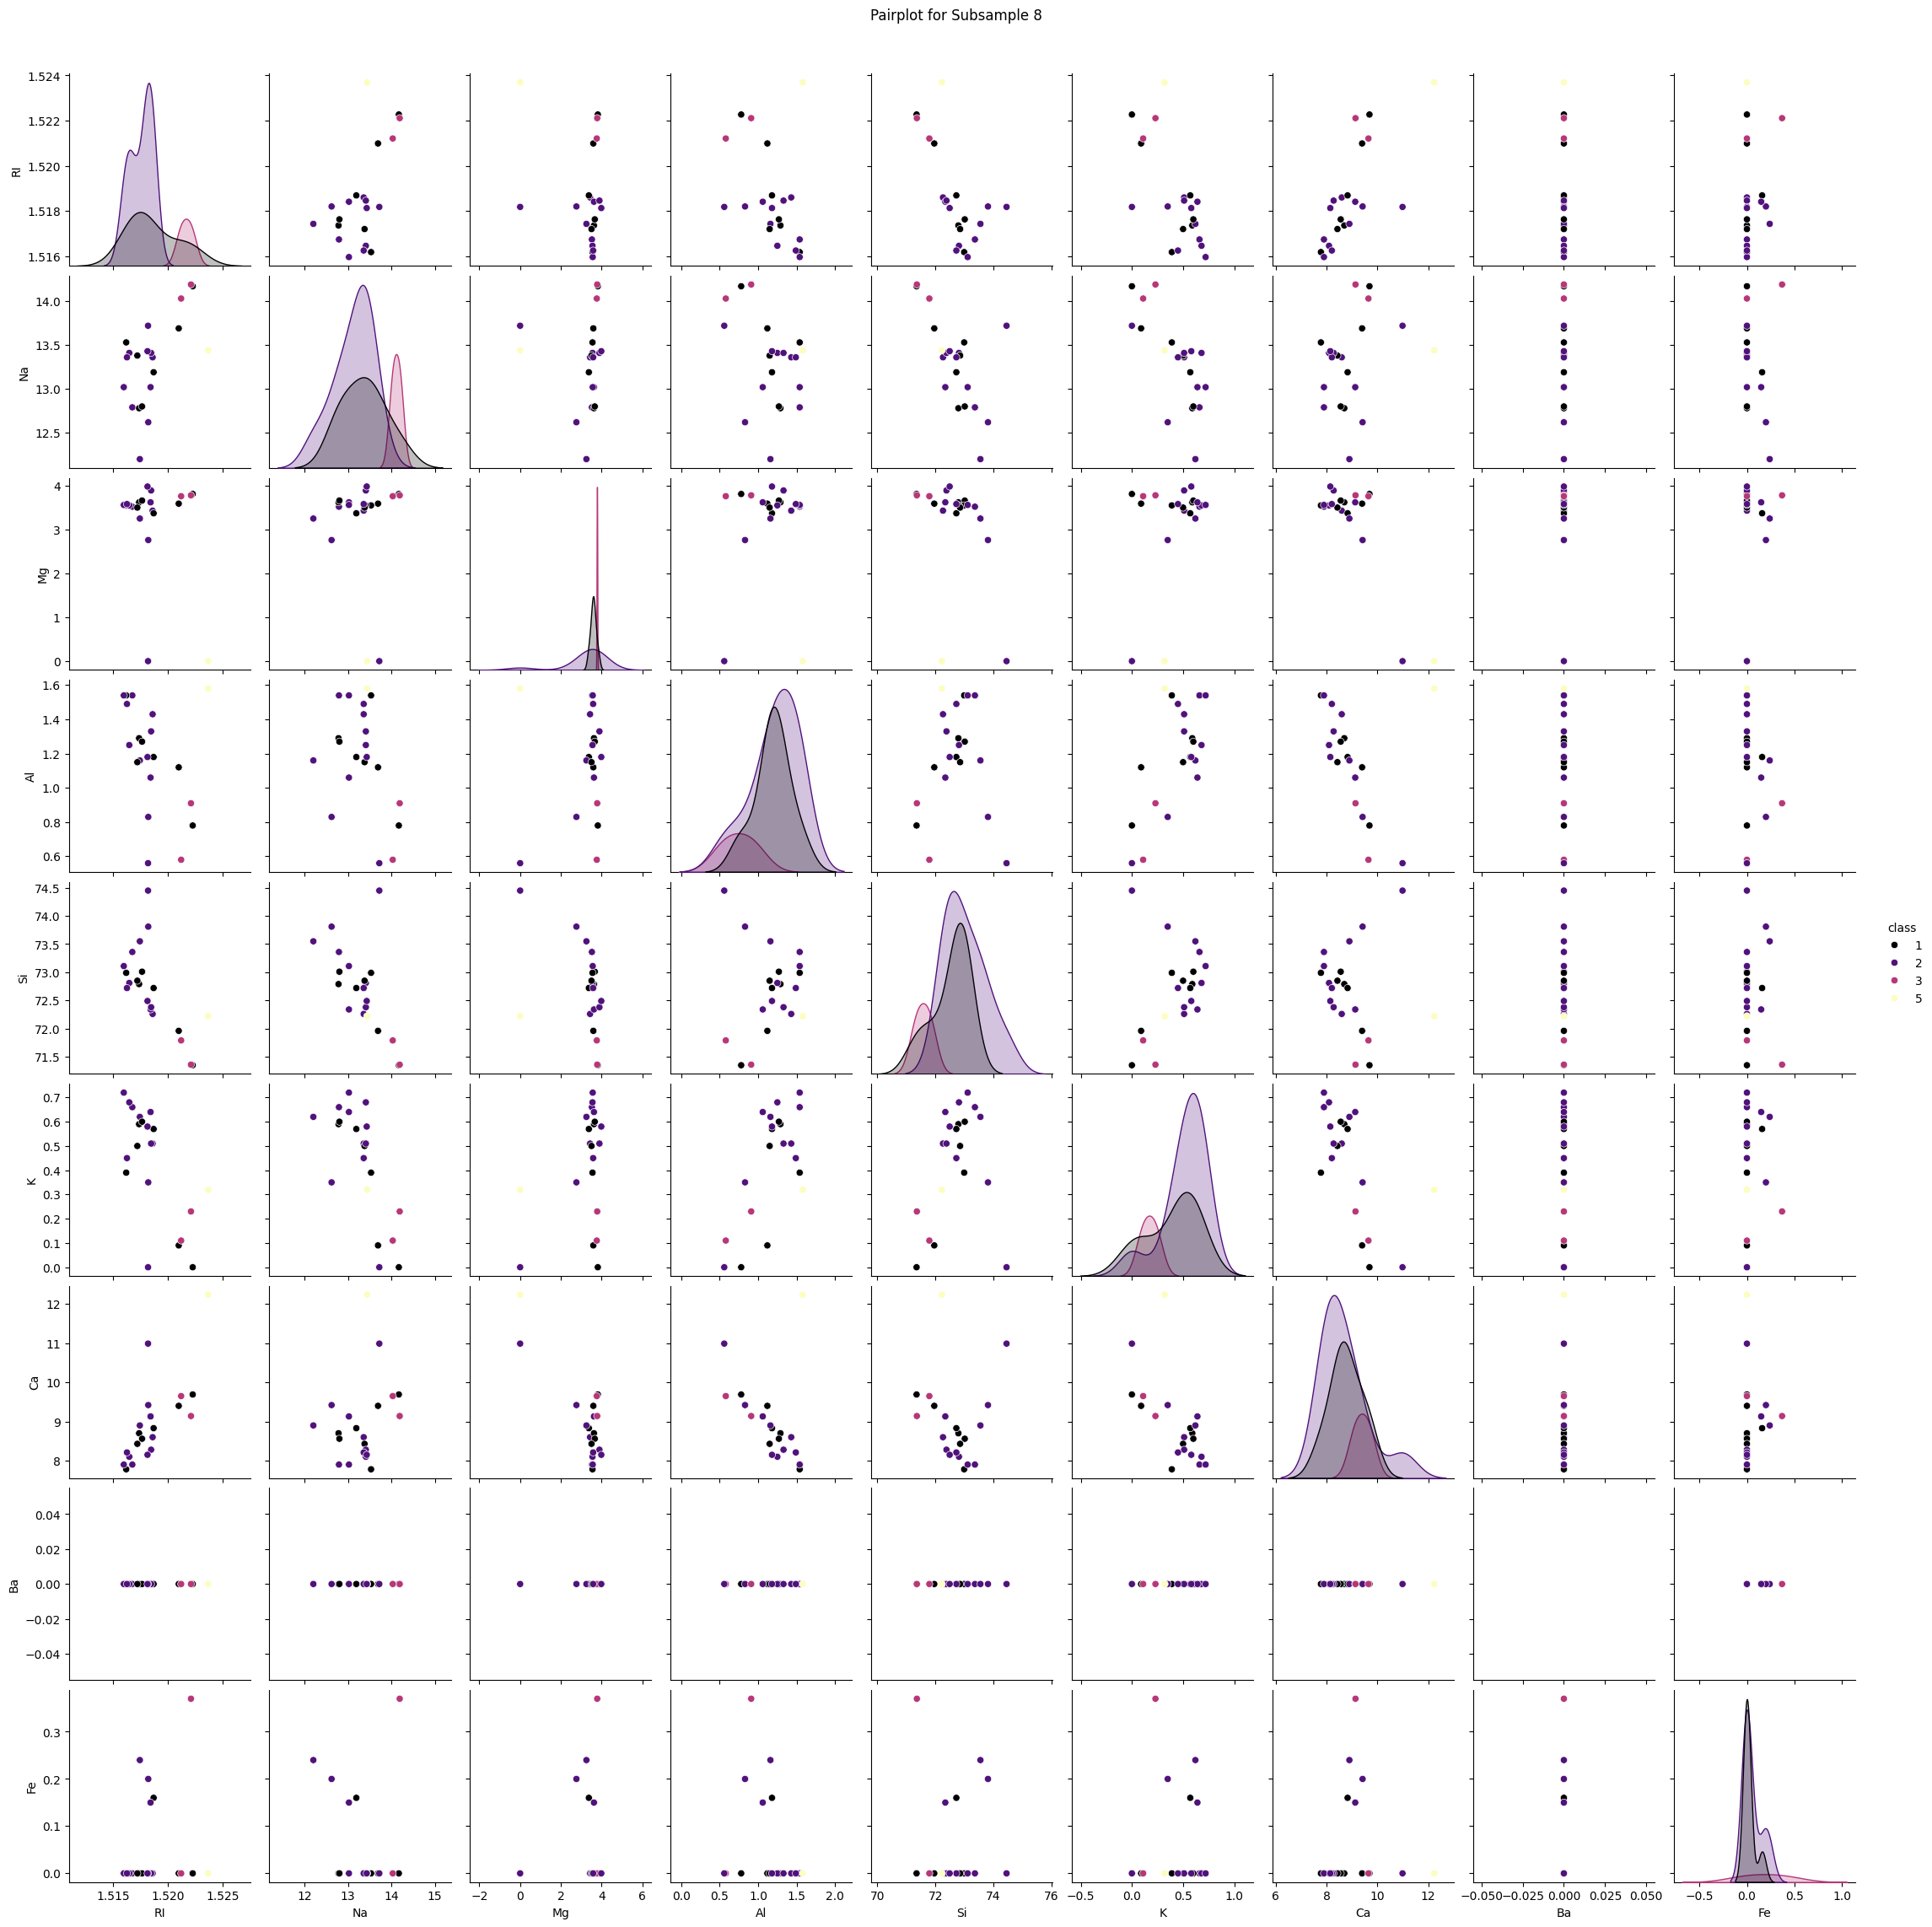

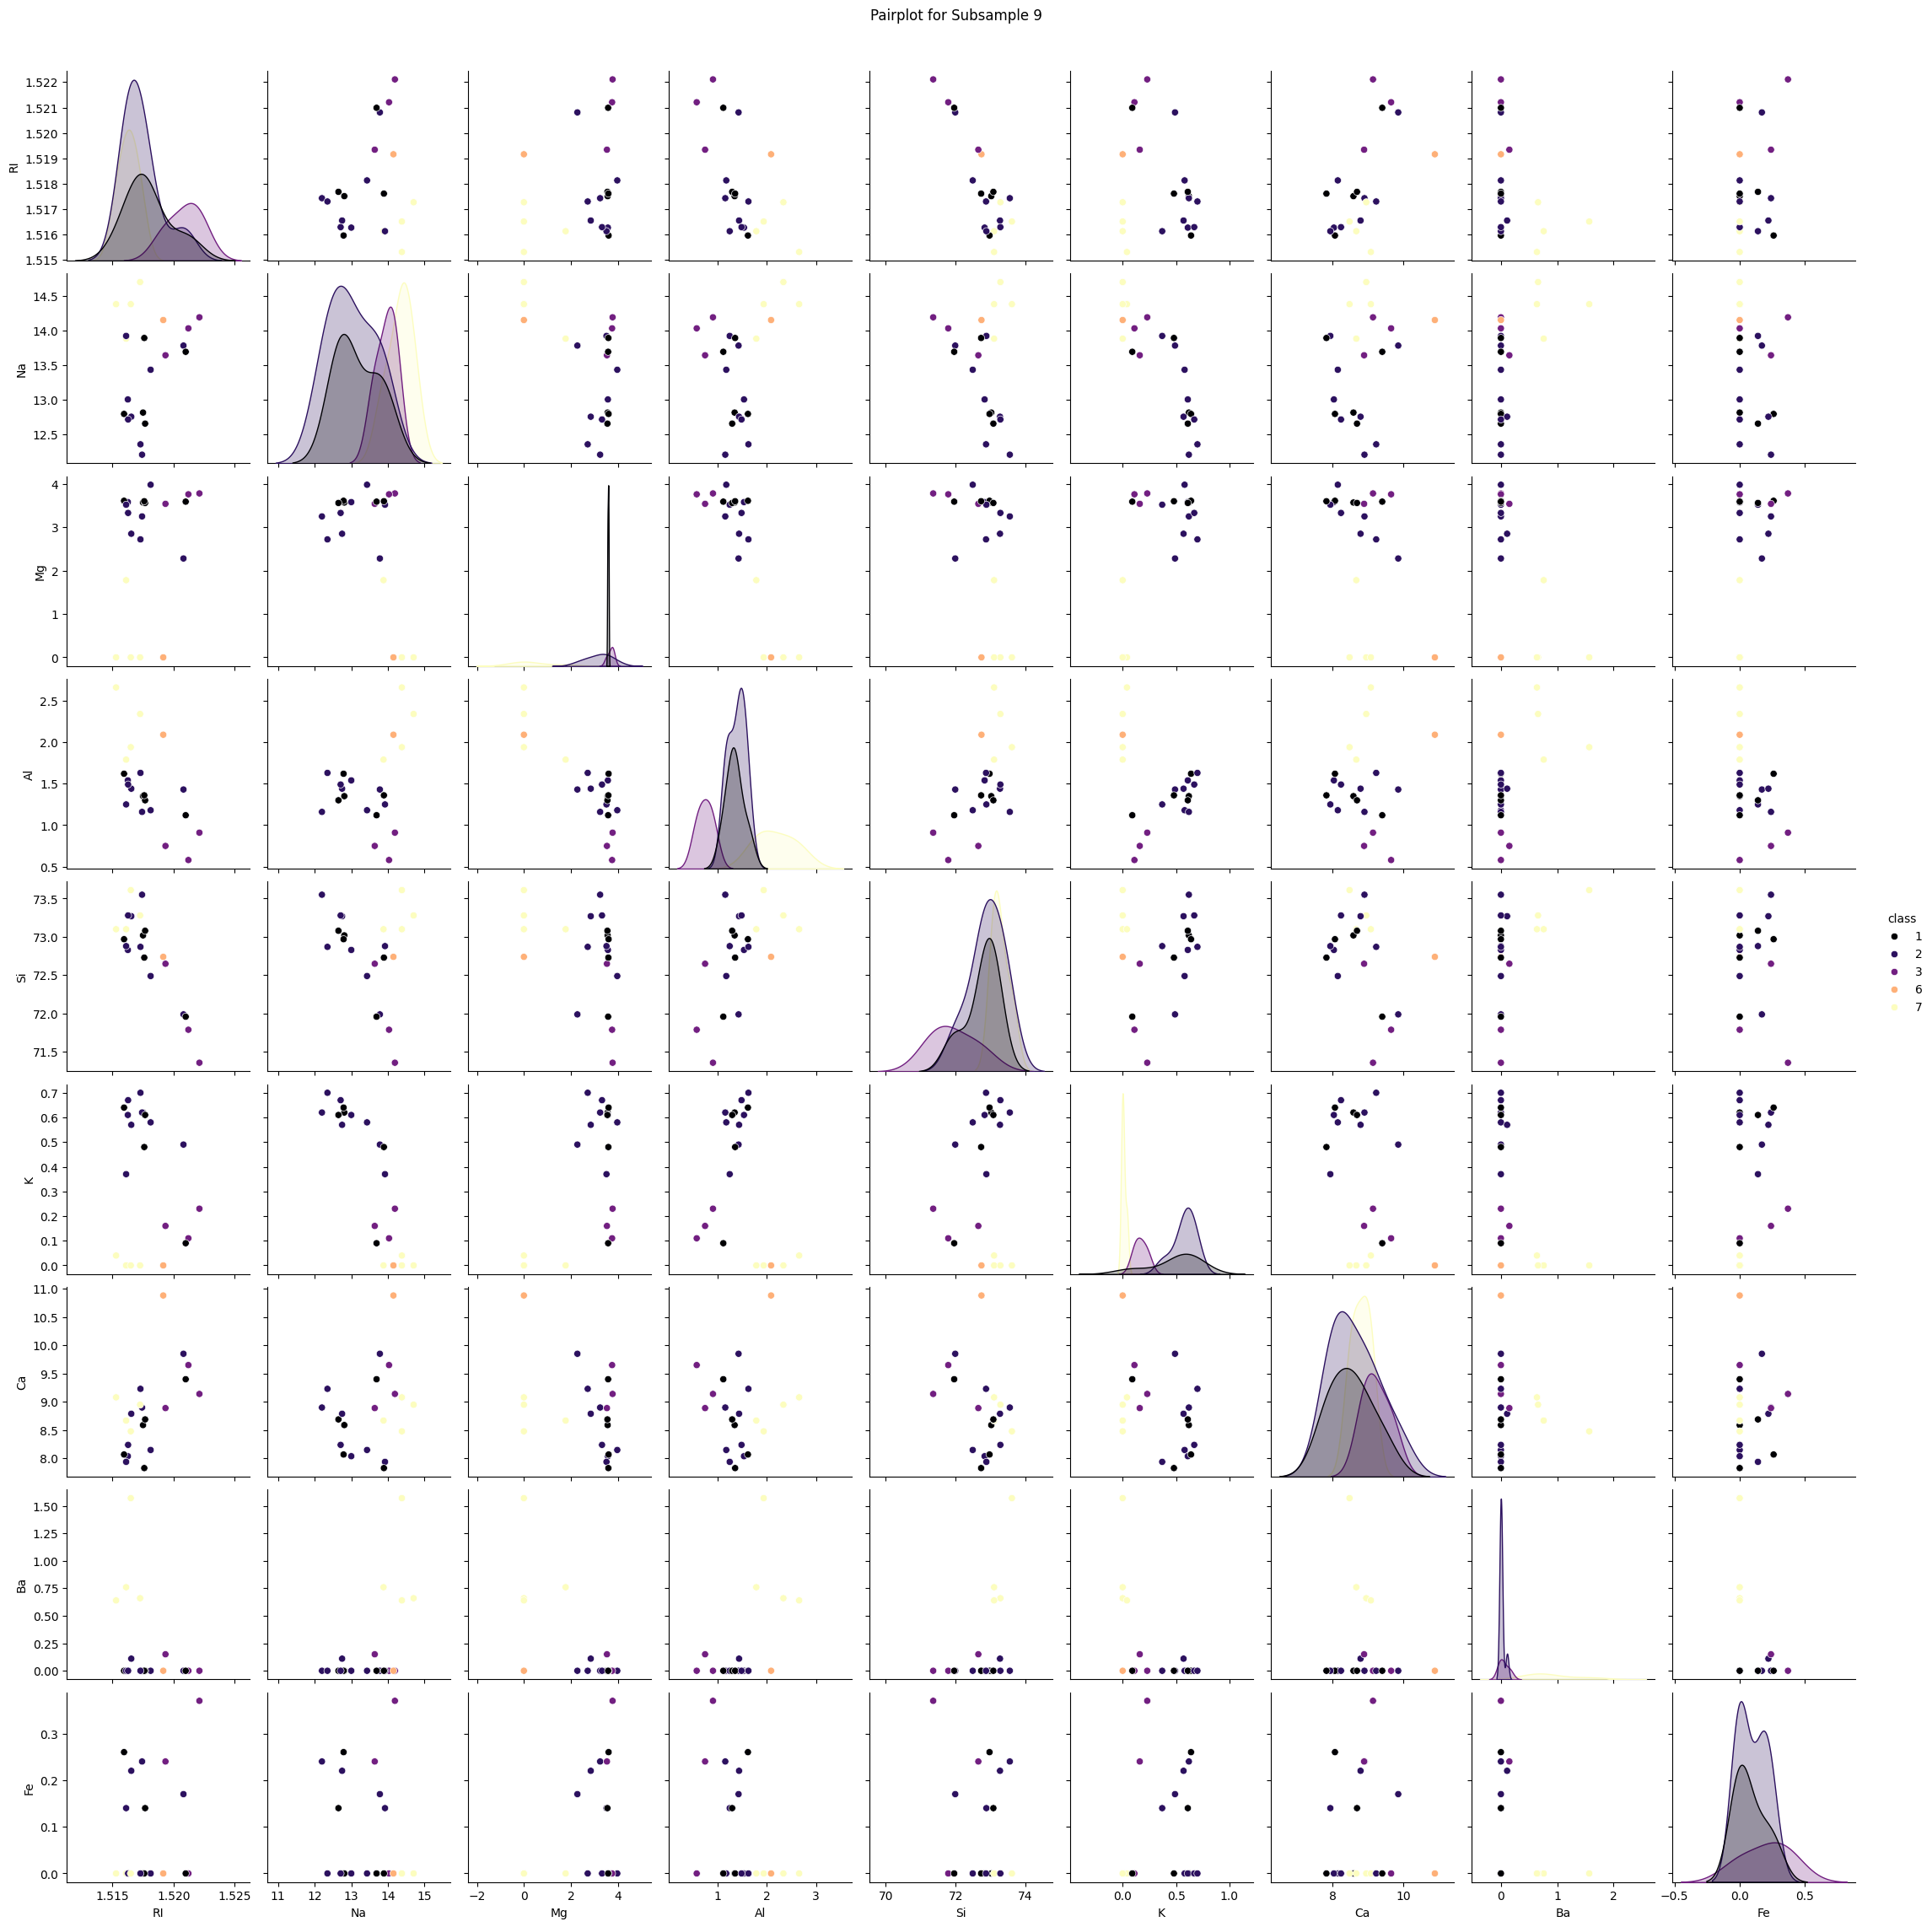

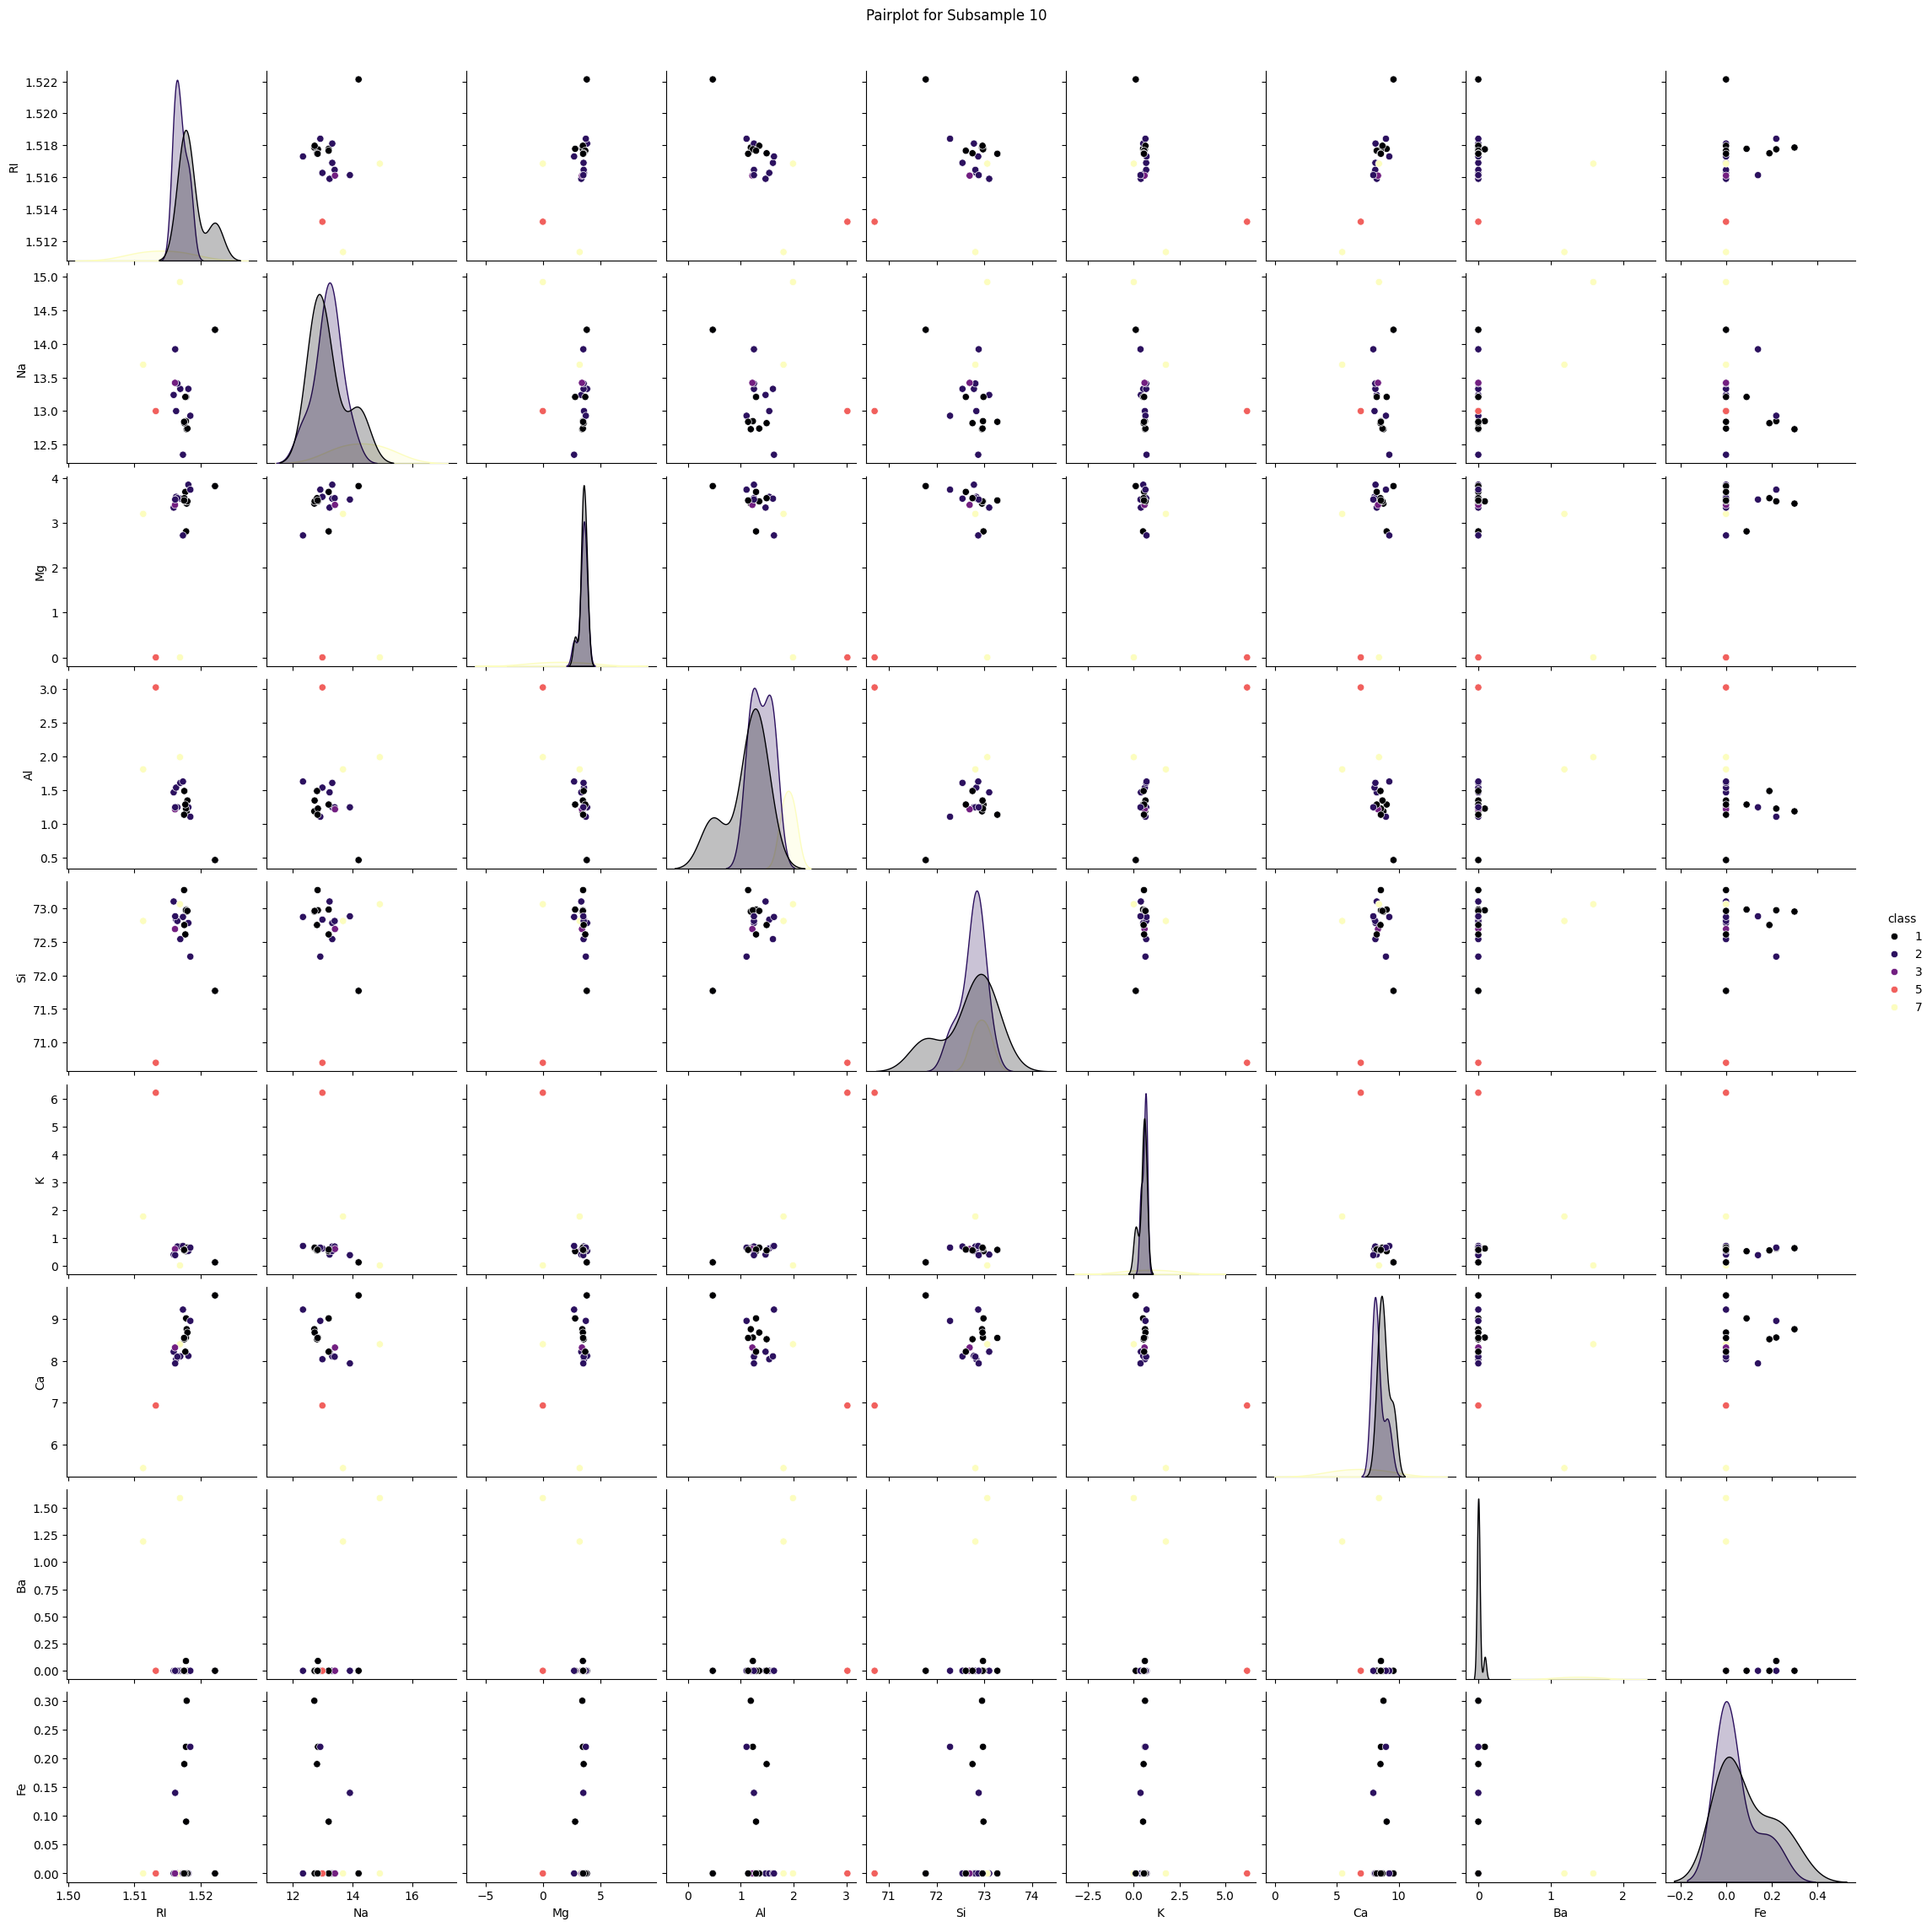

In [12]:
X = glass_identification.data.features
y = glass_identification.data.targets

df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ['class']

num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(num_subsamples):
    subsample = df.sample(subsample_size, random_state=i)
    
    sns.pairplot(subsample, hue='class', palette='magma')
    plt.suptitle(f'Pairplot for Subsample {i+1}', y=1.02)
    plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

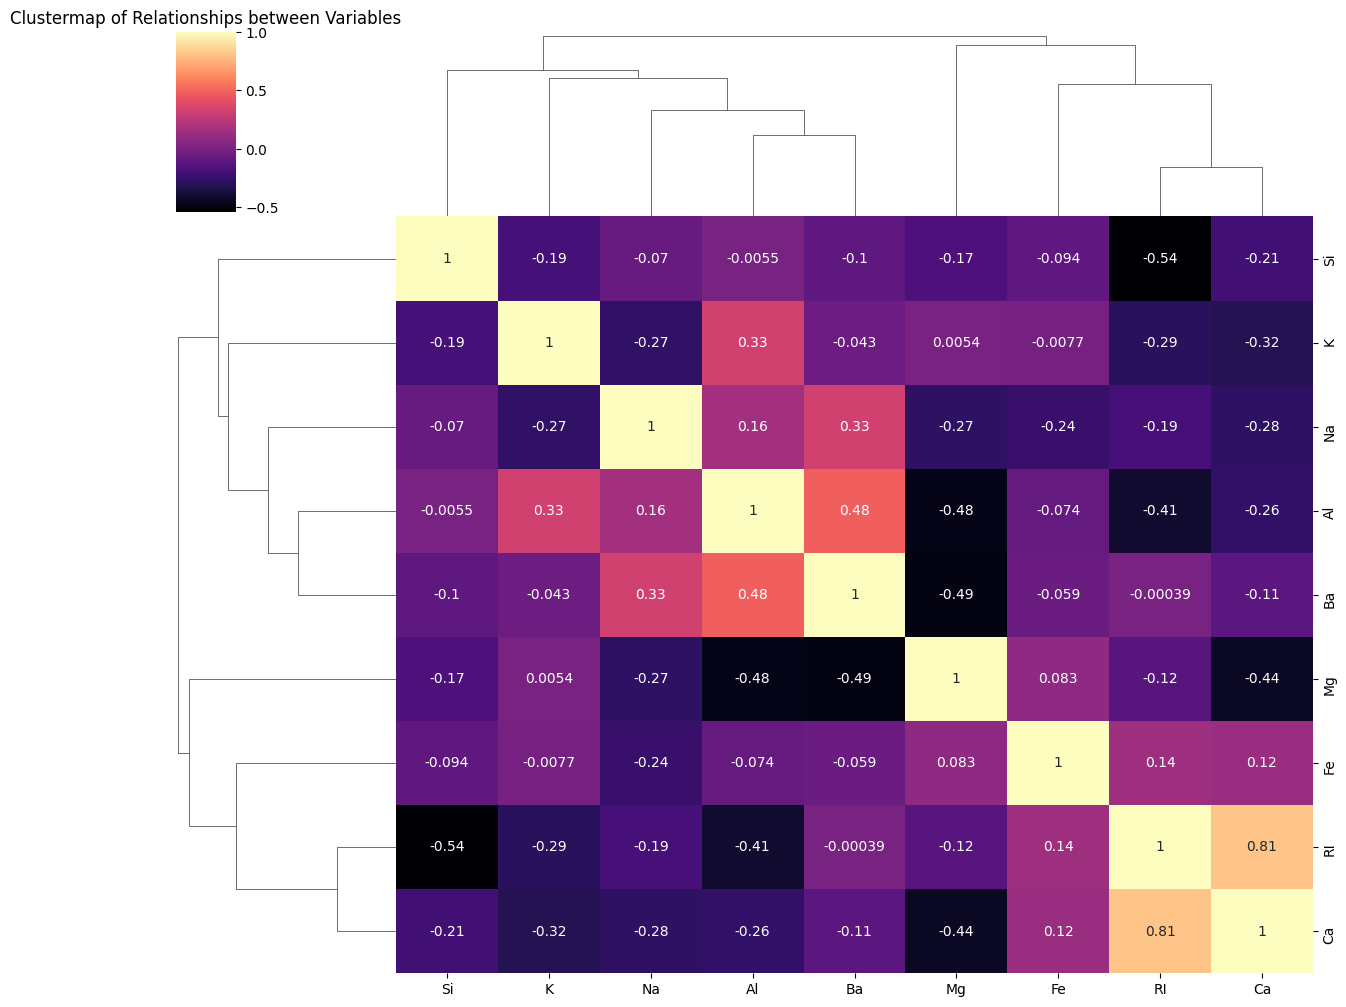

In [28]:
X = glass_identification.data.features
y = glass_identification.data.targets

y = y.values.ravel()

y_encoded = LabelEncoder().fit_transform(y)
df = pd.concat([X, pd.Series(y_encoded, name='class')], axis=1)

correlation_matrix = X.corr()

sns.clustermap(correlation_matrix, annot=True, cmap='magma', figsize=(12, 10))
plt.title('Clustermap of Relationships between Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using gridsearch**

In [14]:
X = glass_identification.data.features
y = glass_identification.data.targets

y = y.values.ravel()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [23]:
print("Initial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Initial Model Performance:
Accuracy: 0.3256
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      1.00      0.49        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.33        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.11      0.33      0.16        43

Confusion Matrix:
[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]


In [20]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters found by GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train)

y_pred_best = best_svc.predict(X_test)

In [26]:
print("Improved Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Improved Model Performance:
Accuracy: 0.7442
Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        11
           1       0.90      0.64      0.75        14
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         4
           4       0.50      0.33      0.40         3
           5       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.64      0.64      0.63        43
weighted avg       0.73      0.74      0.72        43



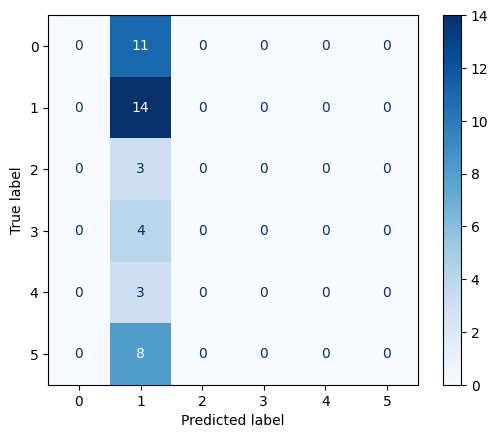

Confusion Matrix:
[[ 0 11  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  8  0  0  0  0]]
True Positives: 0
False Positives: 11
False Negatives: 0
True Negatives: 14


In [25]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

print("Confusion Matrix:")
print(cm)

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")